# Comparison of Airbnb Trends for Los Angeles and New York.

## Introduction
  
In this notebook we compare Airbnb trends between Los Angeles and New York for the past year starting with October 2018 and ending with October of 2019. Our goal is to examine the differences between listings and yearly trends between the two cities.

## Business Understanding
The first step of our data analysis process is to gain business understanding, or in other words -- purpose of the analysis. We breakdown broad general questions into more narrow and specific questions that can be targeted by modeling or exploratory analysis:
- Differences in Airbnb listings between Los Angeles and New York:
  1. Are there differences in the types and sizes of Airbnb listings between Los Angeles and New York?
  2. Are there differences in the offered amenities?
  3. Do the type and size differences translate into listing price differences?
- Differences in Airbnb pricing and availability trends:
  4. Are there differences in the availability and price trends throughout the year? Are some seasons more available and/or less expensive throughout the season? What are the best times to visit each city in terms of price and availability?  
  5. Are there differences in price spikes around weekends and holidays?  
  
To answer the questions posed for this analysis we need to perform exploratory and comparative statistical analysis. We need to carefully evaluate our results and models for statistical significance, ensuring that our conclusions and insights are robust.

##  Data Understanding
Our posed business questions are dealing with the types of listings and pricing throughout the year. Looking through the available Airbnb open source data sets at Kaggle, we select the `calendar.csv` [1, 2] and `listings.csv` [3, 4], containing the Airbnb data for the period of interest to us for Los Angeles and New York, respectively. `calendar.csv` contains time series pricing and availability data, while `listings.csv` contains size, location, host, and other information about each listing.

We are going to load data, making formatting changes based on the information available on the data source website at Kaggle for sister data set for Seattle Airbnb listings [5], and then do a quick exploratory analysis to determine whether any cleaning steps should be performed.

### Setup

In [1]:
import numpy as np
import datetime
from scipy import stats

# Setup pandas
import pandas as pd
pd.plotting.register_matplotlib_converters(explicit=True)  # plotting of dates by pandas
pd.set_option('display.max_columns', 100)  # allow to view all columns in the notebook
from IPython.display import display

# Setup visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16
plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

RANDOM_STATE = 42

###  Load Data
Before we load full datasets let's load a first few lines to save us some headache down the line and make sure we load only the data we need and in the correct format.

In [2]:
calendar = pd.read_csv('./data/los angeles/calendar.csv', nrows=3)
calendar

,listing_id,date,available,price
0,109,2019-08-08,t,$127.00
1,72186,2019-10-04,t,$52.00
2,72186,2019-10-03,t,$52.00


In [3]:
listings = pd.read_csv('./data/new york/listings.csv', nrows=3)
listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20181003014905,2018-10-03,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,Please no cooking at night but you can warm up...,Subway 2.3.B.C. at 110th street around the cor...,Guests will have their PRIVATE BATHROOM (NOTE:...,We will have a list of Harlem restaurants and ...,no-smoking/please take off your shoes: cleanin...,NaN,NaN,https://a0.muscache.com/im/pictures/d0489e42-4...,NaN,2758,https://www.airbnb.com/users/show/2758,Steph,2008-09-06,"New York, New York, United States",loves to host and welcome travelers from arou...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/2758/profile_...,https://a0.muscache.com/im/users/2758/profile_...,Harlem,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10026,New York,"New York, NY",US,United States,40.799205,-73.953676,t,Apartment,Private room,3,1.0,1,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$59.00,$720.00,"$1,690.00",$0.00,$60.00,2,$39.00,2,21,today,t,10,22,44,310,2018-10-03,173,2008-10-13,2018-09-18,93,9,9,10,9,9,9,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42
1,2539,https://www.airbnb.com/rooms/2539,20181003014905,2018-10-03,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,NaN,NaN,-The security and comfort of all our guests is...,NaN,NaN,https://a0.muscache.com/im/pictures/3949d073-a...,NaN,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, New York, United States",Educated professional living in Brooklyn. I l...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/8674565a-7...,https://a0.muscache.com/im/pictures/8674565a-7...,Gravesend,8,8,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn , NY, United States",Kensington,Kensington,Brooklyn,Brooklyn,NY,11218,New York,"Brooklyn , NY",US,United States,40.647486,-73.972370,f,Apartment,Private room,4,1.0,1,3,Real Bed,"{TV,""Cable TV"",Internet,""Wheelchair accessible...",NaN,$149.00,$299.00,$999.00,$100.00,$25.00,1,$25.00,1,730,today,t,25,55,85,360,2018-10-03,8,2015-12-04,2018-07-17,98,10,10,10,10,10,10,f,NaN,NaN,f,f,moderate,f,f,8,

We see that all 4 columns in the **`calendar`** dataset can be useful for our analysis, but we will need to perform the following formatting:
- Import *`date`* as datetime type
- Reformat *`available`* t / f to 1 / 0
- Reformat *`price`*  currency strings to floats
  
**`listings`** is a dataset with a lot more features than **`calendar`**. However, we can reduce the size of the data from the start by selecting only features relevant to our analysis. Since the goal of the analysis is understanding of property sizes and types only we perform the following selections:

**Skip columns with**:
- url links
- textual descriptions - text analysis is beyond the scope of this investigation
- geolocation - we manually add city information based on the source of data
- host information
- data scraping information
- availability related columns - use availability information from the **`calendar`** dataset
- pricing columns - use pricing information from the **`calendar`** dataset
- fees and deposits
- verification and other requirements

With so many columns skipped lets now turn to what features we're keeping.  
  
**Keep columns with**:
- *`id`* - as a key column
- *`experiences offered`* - under the assumptions that any offered experiences my impact the price
- property and room types
- amenities
- property size
- *`guests_included`* (also related to size)

In [4]:
listings_keep_cols = ['id', 'experiences_offered', 'property_type', 'room_type', 'accommodates', 
                      'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet']

We will use to the utility functions below for formatting prices, percentages, and boolean values.

In [5]:
def convert_currency(val):
    """Reformat currency string '$x,xxx.xx' to float.
    
    Notes:
        Treat all values that do not start with '$' as invalid and mark as np.nan
    
    Args:
        val (str): string currency value
        
    Returns:
        float: input convertic to numeric value
    """
    if isinstance(val, str) and val.startswith('$'):
        return float(val.replace('$', '').replace(',', ''))
    else:
        return np.nan


def convert_t_f(val):
    """Reformat 't' 'f' strings indicating boolean True/False to 1/0
    Args:
        val (str): string 't' / 'f' values
        
    Returns:
        1 if val=='t', 0 if val=='f', np.nan otherwise
    """
    if not isinstance(val, str) or not val:
        return np.nan
    elif val == 't':
        return 1
    else:
        return 0

# Test conversion functions
calendar = pd.read_csv('./data/los angeles/calendar.csv', nrows=5, 
                       parse_dates=['date'], infer_datetime_format=True,
                       converters={'available': convert_t_f, 
                                   'price': convert_currency})
calendar

,listing_id,date,available,price
0,109,2019-08-08,1,127.0
1,72186,2019-10-04,1,52.0
2,72186,2019-10-03,1,52.0
3,72186,2019-10-02,1,52.0
4,72186,2019-10-01,1,52.0


We are now ready to load the data sets.

In [6]:
# Cities for which we perform analysis
cities = ['los angeles', 'new york']

# Load
# - date columns as datetime
# - formatting price columns as floats
# - converting 't' / 'f' to 1 / 0
# - labeling missing values as NaN

# Initialize dataframes
calendar = pd.DataFrame()
listings = pd.DataFrame()

# Load data for each city
for city in cities:
    path = './data/' + city + '/'
    
    # load city calendar.csv
    cal = pd.read_csv(path + 'calendar.csv',
                      parse_dates=['date'], infer_datetime_format=True,
                      converters={'available': convert_t_f,
                                  'price': convert_currency})
    
    cal['city'] = city  # keep track where data came from for quick exploratory analysis
    
    calendar = pd.concat([calendar, cal], ignore_index=True)  # combine data from both cities

    # load city listings.csv
    li = pd.read_csv(path + 'listings.csv', usecols=listings_keep_cols, na_values=['none'])
    
    li['city'] = city  # keep track where data came from for quick exploratory analysis
    
    listings = pd.concat([listings, li], ignore_index=True)  # combine data from both cities

In [7]:
calendar.sample(3, random_state=RANDOM_STATE)

,listing_id,date,available,price,city
17636486,2297259,2019-05-05,1,900.0,new york
3519324,9450923,2018-10-11,0,NaN,los angeles
31359690,24783060,2018-12-14,0,NaN,new york


In [8]:
listings.sample(3, random_state=RANDOM_STATE)

,id,experiences_offered,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,city
75123,19770847,NaN,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Pets allowed"",""Free street park...",NaN,new york
19349,17424791,NaN,Loft,Entire home/apt,6,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",NaN,los angeles
37883,26687774,NaN,Apartment,Entire home/apt,4,2.0,2.0,4.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",NaN,los angeles


### Examine Data
Now that we have our data loaded and formatted, let's quickly examine it.
#### calendar:

In [9]:
calendar.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34232620 entries, 0 to 34232619
Data columns (total 5 columns):
listing_id    int64
date          datetime64[ns]
available     int64
price         float64
city          object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.3+ GB


In [10]:
calendar.describe(include='all')

,listing_id,date,available,price,city
count,3.423262e+07,34232620,3.423262e+07,1.339707e+07,34232620
unique,NaN,368,NaN,NaN,2
top,NaN,2018-10-08 00:00:00,NaN,NaN,new york
freq,NaN,93788,NaN,NaN,18264965
first,NaN,2018-10-03 00:00:00,NaN,NaN,NaN
last,NaN,2019-10-05 00:00:00,NaN,NaN,NaN
mean,1.616513e+07,NaN,3.913539e-01,2.114166e+02,NaN
std,8.484408e+06,NaN,4.880533e-01,4.746840e+02,NaN
min,1.090000e+02,NaN,0.000000e+00,0.000000e+00,NaN
25%,9.105638e+06,NaN,0.000000e+00,7.500000e+01,NaN


In [11]:
calendar.isna().mean()

listing_id    0.000000
date          0.000000
available     0.000000
price         0.608646
city          0.000000
dtype: float64

We see that over 60% of entries do not have pricing information. We will deal with the missing values below.
  
Now, let's look at the histogram of dates found in **`calendar`**:

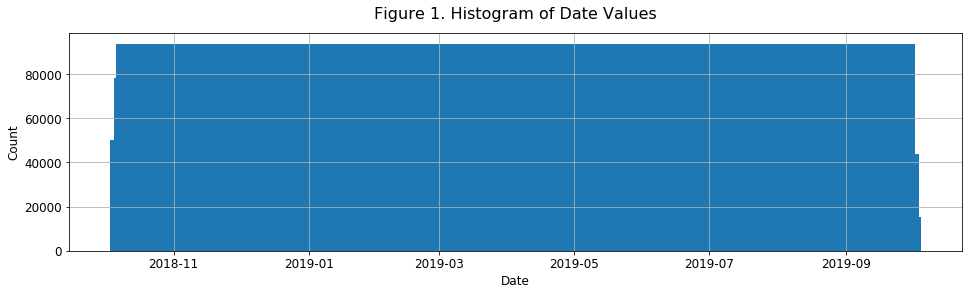

In [12]:
fig1, ax1 = plt.subplots(figsize=(16, 4))
ax1 = calendar.date.hist(bins=calendar.date.nunique(), ax=ax1)
ax1.set_title('Figure 1. Histogram of Date Values', fontsize=16, y=1.04)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Count', fontsize=12);

We see that there appear to be fewer number of listings for dates at the beginning and the end of the date interval (beginning of October of 2018 and beginning of October of 2019). Going back to data source we notice that Los Angeles and New York calendar data sets start and end on slightly different days. We will drop the mismatched dates since they do no influence overall general trends below.
  
Next we examine the distibution of listing prices found in the **`calendar`** dataset.

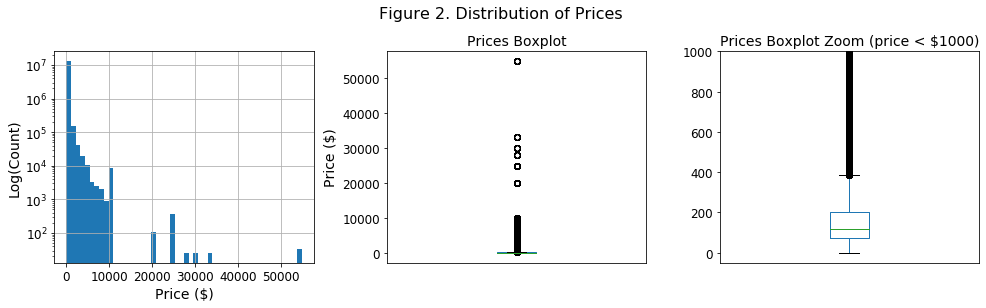

In [13]:
price_zoom = 1000

fig2, axes2 = plt.subplots(1, 3, figsize=(14, 4))

axes2[0] = calendar.price.hist(bins=50, ax=axes2[0], log=True)
axes2[0].set_xlabel('Price ($)')
axes2[0].set_ylabel('Log(Count)')

axes2[1] = calendar.price.plot.box(ax=axes2[1])
axes2[1].set_title('Prices Boxplot')
axes2[1].set_ylabel('Price ($)')

axes2[2], prices_bp = calendar.price.plot.box(return_type='both', ax=axes2[2])
axes2[2].set_title(f'Prices Boxplot Zoom (price < ${price_zoom})')
axes2[2].set_ylim(-50, price_zoom)

# hide x-axis title on boxplots
for ax in axes2[1:]:
    x_axis = ax.axes.get_xaxis()
    x_axis.set_visible(False)

fig2.tight_layout()
fig2.suptitle('Figure 2. Distribution of Prices', y=1.06);

We can from the boxplot of the prices above (center plot) and the zoom of the same plot (right) that there is a large number of outlier prices going into tens of thousands of dollars per night. It makes sense to subdivide the listings into two groups: high and low median priced. We will explore these more closely and deal with them below. 

#### listings:
Now that we have examined the **`calendar`** data, we move onto **`listings`** data:

In [14]:
listings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93804 entries, 0 to 93803
Data columns (total 12 columns):
id                     93804 non-null int64
experiences_offered    0 non-null float64
property_type          93804 non-null object
room_type              93804 non-null object
accommodates           93804 non-null int64
bathrooms              93673 non-null float64
bedrooms               93726 non-null float64
beds                   93697 non-null float64
bed_type               93804 non-null object
amenities              93804 non-null object
square_feet            840 non-null float64
city                   93804 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 8.6+ MB


In [15]:
listings.describe(include='all')

,id,experiences_offered,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,city
count,9.380400e+04,0.0,93804,93804,93804.000000,93673.000000,93726.000000,93697.000000,93804,93804,840.000000,93804
unique,NaN,NaN,46,3,NaN,NaN,NaN,NaN,5,86957,NaN,2
top,NaN,NaN,Apartment,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,{},NaN,new york
freq,NaN,NaN,57149,52910,NaN,NaN,NaN,NaN,92111,403,NaN,50041
mean,1.616444e+07,NaN,NaN,NaN,3.215343,1.279926,1.279592,1.776983,NaN,NaN,850.351190,NaN
std,8.484653e+06,NaN,NaN,NaN,2.288435,0.739328,0.933444,1.461028,NaN,NaN,797.810765,NaN
min,1.090000e+02,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN
25%,9.102076e+06,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,400.000000,NaN
50%,1.751562e+07,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,725.000000,NaN
75%,2.320383e+07,NaN,NaN,NaN,4.000000,1.000000,1.000000,2.000000,NaN,NaN,1011.000000,NaN


In [16]:
listings.isna().mean()

id                     0.000000
experiences_offered    1.000000
property_type          0.000000
room_type              0.000000
accommodates           0.000000
bathrooms              0.001397
bedrooms               0.000832
beds                   0.001141
bed_type               0.000000
amenities              0.000000
square_feet            0.991045
city                   0.000000
dtype: float64

Note that data for the *`experiences_offered`* feature is missing entirely, so we can safely drop it. Additionally, there is less than 1% of data is available for the *`square_feet`* feature. Since most of the data is missing and there are several other size related listing features, we can drop *`square_feet`* feature as well.

*`bathrooms`*, *`bedrooms`*, and *`beds`* features are missing <0.1% of row values. Since the proportion of missing data is small, we will drop the listings with missing values for these features our analysis.
  
Now, let's examine the value distributions for **`listings`** numerical features:

C:\Users\Alexander\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:412: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


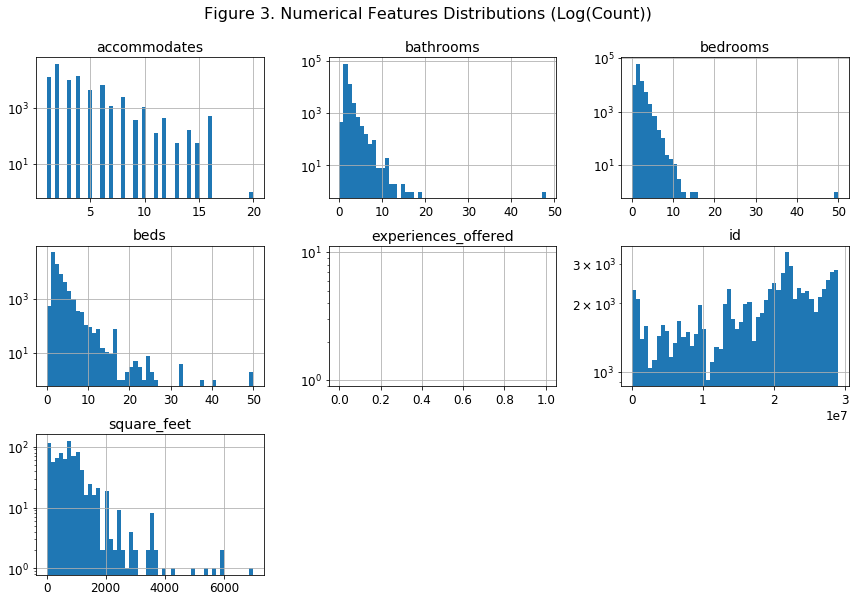

In [17]:
listings.select_dtypes(include=np.number).hist(figsize=(12, 8), bins=50, log=True)
plt.gcf().suptitle('Figure 3. Numerical Features Distributions (Log(Count))', y=1.04)
plt.gcf().tight_layout();

Note that there are outliers in multiple numerical feature distributions.

Finally, we check the cross-correlations between the numerical features:

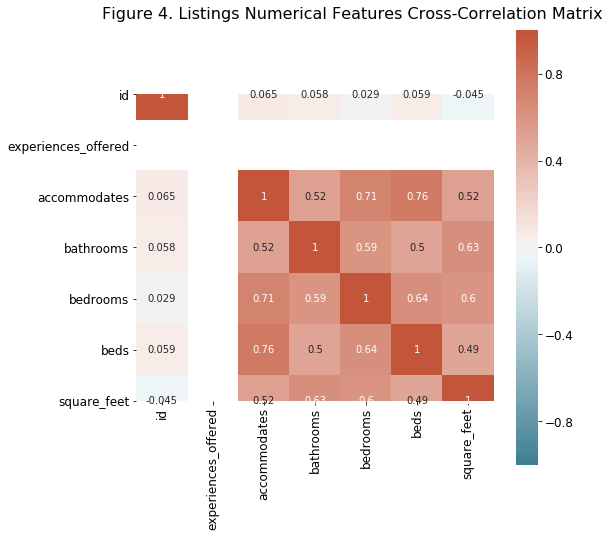

In [18]:
fig4, ax4 = plt.subplots(figsize=(8, 8))
ax4 = sns.heatmap(listings.select_dtypes(include=np.number).corr(), ax=ax4,
                  vmin=-1, vmax=1, center=0, annot=True, square=True,
                  cmap=sns.diverging_palette(220, 20, n=200))
fig4.suptitle('Figure 4. Listings Numerical Features Cross-Correlation Matrix', y=0.92);

The correlation plot above shows that size related features of the listings (accommodates, bedrooms, bathrooms, beds, guests included) are fairly highly correlated. We should be careful dealing with these if we perform any type of regression modeling.
    
Now let's look at our categorical variables:

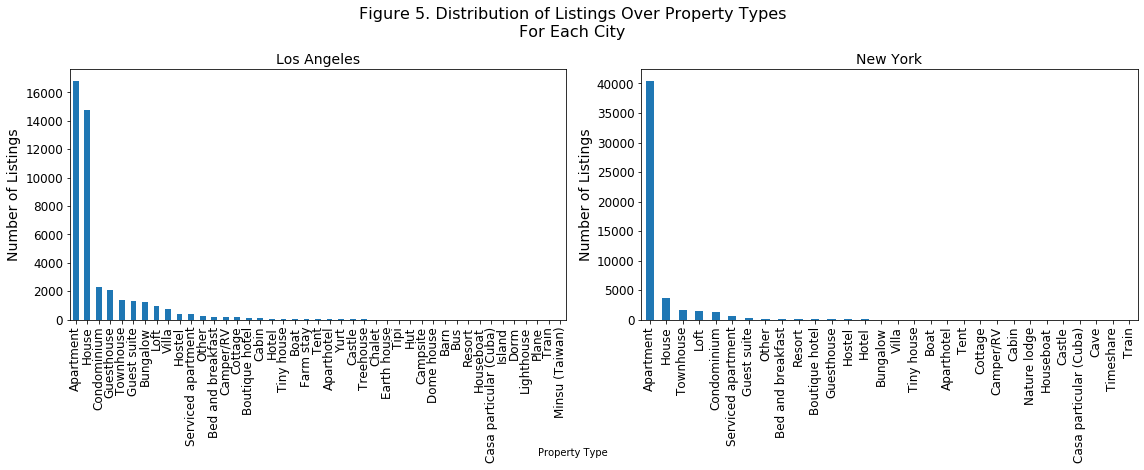

In [19]:
# get sorted by count listings for each property type
property_types = listings.groupby(['city', 'property_type'])\
                         .agg(num_listings=('id', 'count'))\
                         .reset_index()\
                         .sort_values('num_listings', ascending=False)


fig5, ax5 = plt.subplots(1, 2, figsize=(16, 6))

for ax, city in zip(ax5, cities):
    property_types[property_types.city==city].plot(x='property_type', y='num_listings',
                                                   kind='bar', ax=ax, legend=False);
    ax.set_title(city.title())
    ax.set_ylabel('Number of Listings')
ax5[0].set_xlabel('')
ax5[1].set_xlabel('')
fig5.suptitle(f'Figure 5. Distribution of Listings Over Property Types\n'
              f'For Each City', y=1.08)
fig5.text(0.5, 0.04, 'Property Type', ha='center')
fig5.tight_layout();

**Figure 5** shows that most listings types have very few associated listings. Thus, when performing analysis, we should focus on the top represented listing types.

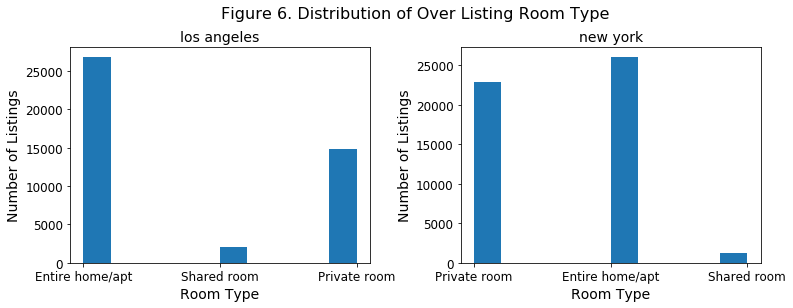

In [20]:
listings.room_type.sort_index().hist(by=listings.city, xrot=0.1, figsize=(12, 4))
for ax in plt.gcf().axes:
    ax.set_xlabel('Room Type')
    ax.set_ylabel('Number of Listings')
plt.gcf().suptitle('Figure 6. Distribution of Over Listing Room Type', y=1.04);

In [21]:
listings.amenities.head()

0    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
1    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
2                                                   {}
3    {Internet,Wifi,"Air conditioning","Wheelchair ...
4    {Internet,Wifi,Kitchen,Heating,Washer,Dryer,"S...
Name: amenities, dtype: object

We must process the data in the *`amenities`* column manually since it is not standardized with each entry contains a variable list of amenities. 

### Data Understanding Summary
**`calendar`**
- 34,232,620 entries of 5 variables
- Over 60\% of *`price`* entries are missing values 
- Non-normal distribution of prices skewed right with far outliers above \$20,000
- Mismatched dates at *`date`* tailends between Los Angeles and New York where not all listings have entries  

**`listings`**
- 93804 entries of 12 variables
- *`experience_offered`* feature is missing all values
- *`square_feet`* feature is missing > 99\% of all values
- *`bathrooms`, `bedrooms`, `beds`* features are missing < 0.15\% of values
- All numerical features are right-skewed with far outlier values
- Significant cross-correlation (> 0.5) between *`accommodates`, `bathrooms`, `bedrooms`, `beds`*
- String encoded *`amenities`* feature contains a mixed-formatted list of keywords and phrases

## Data Preparation 

Now that we have understanding of the types and quality of loaded data, we are going to prepare it for our analysis.

Before doing data cleaning and manipulation we save a copy of the raw data in case we mess up.

In [22]:
# Backup copy of raw datasets in case we mess up
cal_raw = calendar.copy()
listings_raw = listings.copy()

### Missing and/or mismatched values
When preparing our data for analysis and modeling we start by dealing with missing or unusable values.
####  `calendar`

Let's start by cleaning up the mismatched dates between Los Angeles and New York discussed above.

In [23]:
# drop dates where there either Los Angeles or New York data is not available
date_counts = calendar.groupby('date')['date'].agg('count')
drop_dates = date_counts[date_counts < date_counts.max()].index.values
print('Mismatched dates between Los Angeles and New York calendar datasets:\n', drop_dates)

Mismatched dates between Los Angeles and New York calendar datasets:
 ['2018-10-03T00:00:00.000000000' '2018-10-04T00:00:00.000000000'
 '2018-10-05T00:00:00.000000000' '2019-10-03T00:00:00.000000000'
 '2019-10-04T00:00:00.000000000' '2019-10-05T00:00:00.000000000']


In [24]:
calendar = calendar[~calendar.date.isin(drop_dates)]

Now let's look at the calendar price missing values more closely.

In [25]:
calendar[calendar.price.isna()].sample(5, random_state=RANDOM_STATE)

,listing_id,date,available,price,city
33491772,28014733,2019-01-02,0,NaN,new york
14857619,27984258,2019-08-06,0,NaN,los angeles
12413196,24680083,2019-06-20,0,NaN,los angeles
23889425,13796187,2019-01-05,0,NaN,new york
33012739,27373599,2018-12-11,0,NaN,new york


It appears that all missing price values are corresponding to unavailability of listing on that date encoded as `available=0`. Let's check if it is true for every missing price entry.

In [26]:
# check aif missing any listings were available for dates where price is missing
is_missing_price_always_unavailbale = pd.Series((calendar.available == 0) == (calendar.price.isna())).all()
print('All observations with missing prices correspond to unavailability (available=0) and vice versa' 
      if is_missing_price_always_unavailbale
      else 'Some observations with missing prices are listed as available')

All observations with missing prices correspond to unavailability (available=0) and vice versa


Note that listing availability maps 1:1 with missing price data. Although, we have to be careful about dropping missing price rows since dropped availability data may skew seasonal and cumulative availability patterns, listings that are not available for the entire data time interval do not provide us with any trend information for this period and, thus, can be dropped.

In [27]:
# Sum listing availability for each listing id
listing_availability = calendar.groupby(['listing_id']).agg(total_available=('available', 'sum'))\
        .reset_index()

# Find listing ids with 0 total availability
never_available_listings = listing_availability[listing_availability.total_available == 0]\
        .listing_id.values

In [28]:
print(f'Found {len(never_available_listings)} listings '
      f'({100.0 * len(never_available_listings) / len(calendar.listing_id.unique()):.2f}% of total) '
      f'that are never available.')

Found 26330 listings (28.07% of total) that are never available.


We will drop these listings from **`calendar`**.

In [29]:
# drop never available listings from calendar data set
calendar = calendar[~calendar.listing_id.isin(never_available_listings)]

In [30]:
print(f'Cleaned calendar contains {len(calendar.index)} daily prices for'
      f' {calendar.listing_id.nunique()} unique listings.')

Cleaned calendar contains 24419796 daily prices for 67458 unique listings.


In [31]:
calendar_listing_ids = calendar.listing_id.unique()
calendar_listing_ids

array([     109,    72186,    25445, ..., 28982976, 28983635, 28983774],
      dtype=int64)

#### `listings`
After cleaning up the **`calendar`** dataset, let's move on to **`listings`**.

Since we use the **`listings`** data set to model average prices calculated in **`calendar`** data set, we will drop all listings for which calculated pricing data is not available by merging average listing price data with **`listings`** data:

In [32]:
price_ave_df = calendar.groupby('listing_id').price.mean()\
                       .reset_index().rename(columns={'listing_id': 'id', 'price': 'price_ave'})
price_ave_df

,id,price_ave
0,109,126.157895
1,344,175.500000
2,2404,85.000000
3,2515,82.345161
4,2539,154.697222
...,...,...
67453,29041476,19.078652
67454,29042858,60.736842
67455,29042908,60.000000
67456,29046064,109.000000


In [33]:
listings = price_ave_df.merge(listings, on='id')
listings

,id,price_ave,experiences_offered,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,city
0,109,126.157895,NaN,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,los angeles
1,344,175.500000,NaN,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,los angeles
2,2404,85.000000,NaN,Apartment,Shared room,1,NaN,1.0,1.0,Airbed,{},NaN,los angeles
3,2515,82.345161,NaN,Apartment,Private room,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,new york
4,2539,154.697222,NaN,Apartment,Private room,4,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wheelchair accessible...",NaN,new york
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67453,29041476,19.078652,NaN,House,Shared room,1,3.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Smoking a...",NaN,los angeles
67454,29042858,60.736842,NaN,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Free parking on premises"",Heating,Wa...",NaN,los angeles
67455,29042908,60.000000,NaN,Condominium,Shared room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",NaN,los angeles
67456,29046064,109.000000,NaN,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",NaN,los angeles


For convenience we set *`id`* column as index since it will not be used as a variable in our models.

In [34]:
listings = listings.set_index('id')

Now, let's drop the columns with over 99% of missing values found in **Data Understanding** section above:

In [35]:
# drop columns with > 99% missing values
listings = listings.drop(columns=['experiences_offered', 'square_feet'])

Now we drop rows with missing values for columns with total of < 0.1% of missing data (see **Section 2.2. listings** above):

In [36]:
listings = listings.dropna(subset=['bathrooms', 'bedrooms', 'beds'], axis=0, how='any')

In [37]:
# check for missing data
listings.isna().sum()

price_ave        0
property_type    0
room_type        0
accommodates     0
bathrooms        0
bedrooms         0
beds             0
bed_type         0
amenities        0
city             0
dtype: int64

In [38]:
print(f'Our cleansed datasets are:\n'
      f'Calendar dataset with {len(calendar.index)} observations of '
      f'{len(calendar.columns)} features for dates ranging from '
      f'{calendar.date.min().date()} to {calendar.date.max().date()}.\n'
      f'Listings dataset of {len(listings.index)} unique listing id\'s '
      f'with {len(listings.columns)} features.')

Our cleansed datasets are:
Calendar dataset with 24419796 observations of 5 features for dates ranging from 2018-10-06 to 2019-10-02.
Listings dataset of 67264 unique listing id's with 10 features.


### Feature Engineering
In this section we generate features useful for exploratory analysis and modeling.
#### Listing price bins

Let's address the outliers in the distribution of listing prices (see **Figure 2** above).

In [39]:
outlier_prices = [flier.get_ydata() for flier in prices_bp["fliers"]][0]  # get outlier values from boxplot
print(f'Outlier prices threshold is ${outlier_prices.min():.2f}')

Outlier prices threshold is $388.00


We can see that there are a lot of outliers above $388.00 in the price distribution. We need to determine whether these outliers are caused by differences in typical price listings with a small subset of expensive listings appearing as outliers, or whether some list prices are true outliers. We can do that by examining the **median** prices for each listing and splitting off the high-priced listings. Note that because we may have outliers, we use median price per listing rather than the mean, since median is less sensitive to potential outliers.
  
While we're doing summary statistics, we will also look at mean, min, max, percent range ($100 \% \cdot range / mean $), and overall availability (using count) for each listing.

In [40]:
price_agg = calendar.groupby(['listing_id', 'city'])\
                    .agg(days_available=('price', 'count'),
                         price_median=('price', 'median'),
                         price_mean=('price', 'mean'),
                         price_min=('price', 'min'),
                         price_max=('price', 'max')).reset_index()

# Price percent range for a given listing
price_agg['price_prange'] = 100.0 * (price_agg.price_max - price_agg.price_min) / price_agg.price_mean

In [41]:
price_agg.sample(3, random_state=RANDOM_STATE)

,listing_id,city,days_available,price_median,price_mean,price_min,price_max,price_prange
54824,25867889,los angeles,36,220.0,220.000000,220.0,220.0,0.000000
38576,20750988,los angeles,66,325.0,325.166667,325.0,331.0,1.845208
48385,23731257,los angeles,353,189.0,189.000000,189.0,189.0,0.000000


Before proceeding with outlier median price listings let's briefly look at the changes in price for a given listing by looking at the listing price percent range, *`price_prange`*.

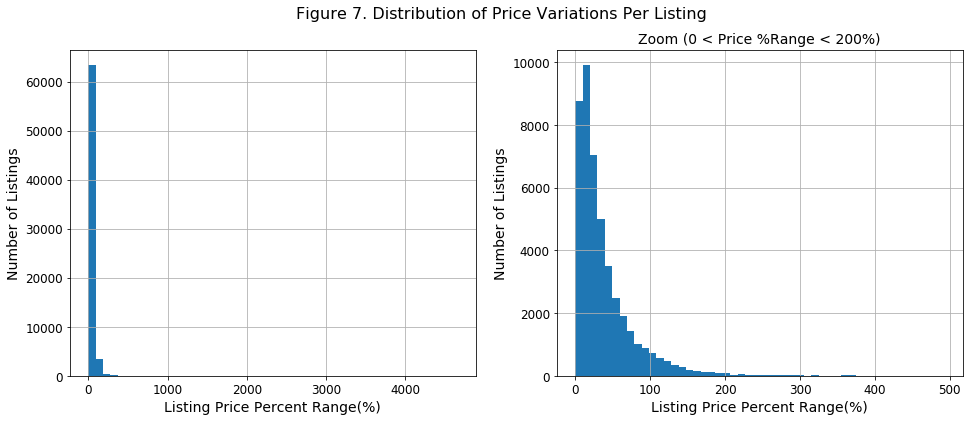

In [42]:
fig7, ax7 = plt.subplots(1, 2, figsize=(16, 6))

price_agg.price_prange.hist(ax=ax7[0], bins=50)
price_agg.price_prange[(price_agg.price_prange < 500) 
                       & (price_agg.price_prange > 0)].hist(ax=ax7[1], bins=50)

for ax in ax7:
    ax.set_ylabel('Number of Listings')
    ax.set_xlabel('Listing Price Percent Range(%)')
ax7[1].set_title('Zoom (0 < Price %Range < 200%)')
fig7.suptitle('Figure 7. Distribution of Price Variations Per Listing');

In [43]:
# proportion of listings with fixed price throughout the year
print(f'{100 * (price_agg.price_prange==0).mean():.2f}% of listings have fixed price throughout the year')

# Most frequent price % range for non-fixed price listings
print(f'Most frequent price range for non-fixed price listings is '
      f'{price_agg[price_agg.price_prange > 0].price_prange.mode()[0]:.2f}%')

# Median price % range for non-fixed price listings
print(f'Median price range for non-fixed price listings is '
      f'{price_agg[price_agg.price_prange > 0].price_prange.median():.2f}%')

# Mean price % range for non-fixed price listings
print(f'Mean price range for non-fixed price listings is '
      f'{price_agg[price_agg.price_prange > 0].price_prange.mean():.2f}%')

32.51% of listings have fixed price throughout the year
Most frequent price range for non-fixed price listings is 14.42%
Median price range for non-fixed price listings is 24.88%
Mean price range for non-fixed price listings is 39.08%


From **Figure 7** we note that a large proportion of listings (~32.5\%) do not change prices througout the year. This is a significant proportion of all listings and may even impact the overall weekend vs. weekday price trends, but we'll get to these a little later.

Now let's plot a histogram of listing median prices and mark outlier threshold prices found using interquantile range (IQR) method. Typical outlier boundary (Tukey fences) value is $1.5 \cdot IQR$. We can use $3 \cdot IQR$ to find "far" outliers since our dataset is large and we can expect to see a broad range of prices.
  
The utility function to find outlier boundary is below.

In [44]:
def iqr_outlier_boundary(arr, k=1.5):
    """Return interquantile range outlier (IQR) thresholds of the input numeric array 
    
    IQR = Qutntile 3 - Quantile 1
    lower threshold = Quntile 1 - k * IQR (outliers lie below lower threshold)
    upper threshold = Quantile 3 + k * IQR (outliers lie above upper threshold)
    
    Args:
        arr [num]: numeric array
        k (float): interquantile box length multiplier.  (Standard Tukey uses k=1.5)
        
    Returns:
        lower outlier threshold, upper outlier threshold
    """
    q1 = arr.quantile(0.25)
    q3 = arr.quantile(0.75)
    iqr = q3 - q1
    
    return (q1 - k * iqr, q3 + k * iqr)

In [45]:
# We do not need a lower outlier boundary since we're looking at high priced outliers
_, outlier_iqr1_5 = iqr_outlier_boundary(price_agg.price_median, 1.5)
_, outlier_iqr3 = iqr_outlier_boundary(price_agg.price_median, 3)

print(f'Tukey outlier boundary (k=1.5) is ${outlier_iqr1_5:.2f}')
print(f'Far outlier boundary (k=3) is ${outlier_iqr3:.2f}')

Tukey outlier boundary (k=1.5) is $379.50
Far outlier boundary (k=3) is $564.00


Let's visualize where the outliers are in our distribution.

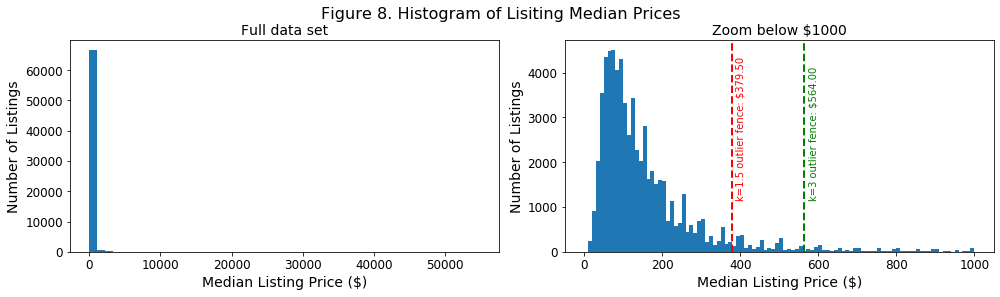

In [46]:
zoom_price = 1000  # Change graph scale to zoom in on the area of interest

fig8, ax8 = plt.subplots(1, 2, figsize=(14, 4))

# Plot full data set
ax8[0] = price_agg.price_median.hist(bins=50, ax=ax8[0], grid=False)
ax8[0].set_title ('Full data set')

# Plot subset of data with median price < zoom price
ax8[1] = price_agg[price_agg.price_median < zoom_price].price_median.hist(ax=ax8[1], bins=100, grid=False)
ax8[1].set_title(f'Zoom below ${zoom_price}')

# Add axis labels
for ax in ax8:
    ax.set_ylabel('Number of Listings')
    ax.set_xlabel('Median Listing Price ($)')

# Add marker for outlier thresholds
transform=ax8[1].get_xaxis_transform()
for k, cut, color in zip([1.5, 3], [outlier_iqr1_5, outlier_iqr3], ['r', 'g']):
    ax8[1].axvline(x=cut, color=color, linestyle='dashed', linewidth=2)
    plt.text(1.02 * cut, 0.25, f'k={k} outlier fence: ${cut:.2f}', 
             transform=transform, rotation=90, color=color)

fig8.suptitle('Figure 8. Histogram of Lisiting Median Prices', y=1.02)
fig8.tight_layout();

Looking at the zoom of the histogram of listing median prices on the right, we see that standard $1.5 \cdot IQR$ cutoff leaves a good bit of the median price distribution tail, so we choose outlier cutoff to be $3 \cdot IQR$ (although either fence value is reasonable for our large sample size)  
  
Let's create a feature indicating whether listing belongs to low or high median price bin.

In [47]:
outlier_threshold = outlier_iqr3
price_bins = [f'median <= ${outlier_threshold}', f'median > ${outlier_threshold}']

In [48]:
# Listing_ids for listings with median price above outlier threshold
low_priced_listing_ids = price_agg[price_agg.price_median <= outlier_threshold].listing_id.values
high_priced_listing_ids = price_agg[price_agg.price_median > outlier_threshold].listing_id.values

# Add column indicating high/low priced listing bin in calendar and price_summary
calendar['listing_price_bin'] = np.where(calendar.listing_id.isin(low_priced_listing_ids), 
                                         price_bins[0], price_bins[1])
price_agg['listing_price_bin'] = np.where(price_agg.listing_id.isin(low_priced_listing_ids), 
                                          price_bins[0], price_bins[1])

print(f'There are {len(high_priced_listing_ids)} high priced listings '
      f'({100.0 * len(high_priced_listing_ids) / len(price_agg.index):.2f}% total) '
      f'with median price above ${outlier_threshold}')

There are 2738 high priced listings (4.06% total) with median price above $564.0


In [49]:
# Show sample of data with high_priced feature
price_agg.groupby('listing_price_bin').apply(lambda x: x.sample(random_state=RANDOM_STATE))

,,listing_id,city,days_available,price_median,price_mean,price_min,price_max,price_prange,listing_price_bin
listing_price_bin,,,,,,,,,,
median <= $564.0,60619,27552275,los angeles,326,149.0,151.748466,109.0,179.0,46.128967,median <= $564.0
median > $564.0,12067,6453112,los angeles,360,1999.0,2070.427778,1999.0,3000.0,48.347497,median > $564.0


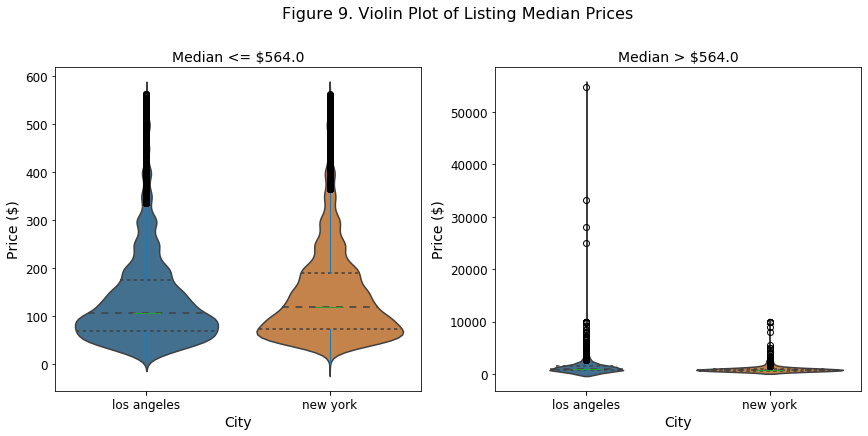

In [50]:
# Box plot 2 data subsets side to see outliers for each subset
fig9, ax9 = plt.subplots(1, 2, figsize=(14,6))

for ax, price_bin in zip(ax9, price_bins):
    df = price_agg[price_agg.listing_price_bin==price_bin]
    sns.violinplot(ax=ax, x='city', y='price_median', data= df, order=cities,
                   saturation=0.5, inner='quartile')
    df.boxplot(ax=ax, column='price_median', by='city', 
               grid=False, showbox=False, showcaps=False, positions=np.array([0, 1]))
    ax.set_title(price_bin.capitalize())
    ax.set_ylabel('Price ($)')
    ax.set_xlabel('City')
fig9.suptitle('Figure 9. Violin Plot of Listing Median Prices', y=1.04);

We see that the there are 4 far-outlier listings in Los Angeles with median prices above \$20,000. For the purpose of examining **general** trends we will **drop** these listings from our analysis, but just to satisfy our curiosity let's very briefly examine them.

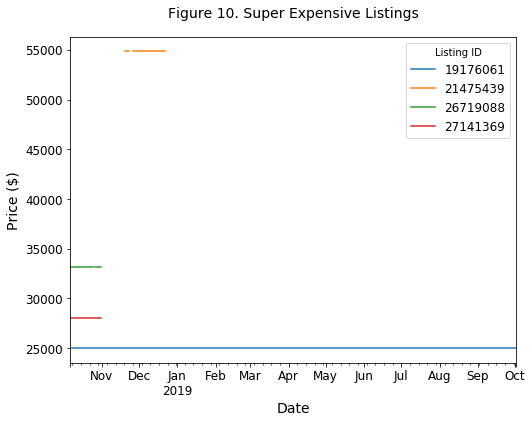

In [51]:
# Get super expensive listing ids
super_expensive_listing_ids = price_agg[price_agg.price_median > 20000].listing_id

# Time plot of prices throughout the year for super expensive listings
fig10, ax10 = plt.subplots(figsize=(8, 6))
for listing_id in super_expensive_listing_ids:
    calendar[calendar.listing_id==listing_id].plot(x='date', y='price', ax=ax10, label=listing_id,
                                                   legend=False)
ax10.set_title('Figure 10. Super Expensive Listings', y=1.04)
ax10.set_xlabel('Date')
ax10.set_ylabel('Price ($)')
ax10.legend(title='Listing ID');

From our plot and listing descriptions above we can say that:
- Listing with id **19176061** is for a large villa on a 3-acre property for up to 16 person occupancy that was available for the entire year at a constant price of \$25,000  
- The other three listings (**27141369**, **26719088**, and **21475439**) are for smaller apartments and are likely mispriced 100x (misplaced coma or period). These listings were only available for one month out of the year further supporting our theory of incorrect pricing

In [52]:
# Drop extreme price outlier listings
calendar = calendar[~calendar.listing_id.isin(super_expensive_listing_ids)]
price_agg = price_agg[~price_agg.listing_id.isin(super_expensive_listing_ids)]

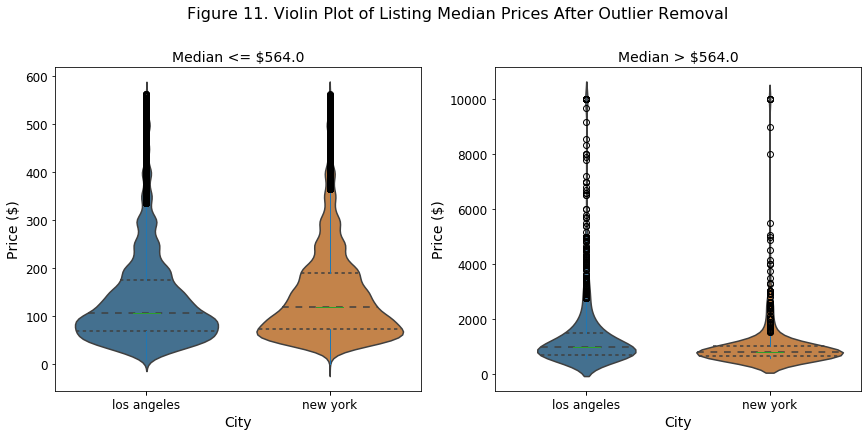

In [53]:
# Box plot 2 data subsets side to see outliers for each subset
fig11, ax11 = plt.subplots(1, 2, figsize=(14,6))

for ax, price_bin in zip(ax11, price_bins):
    df = price_agg[price_agg.listing_price_bin==price_bin]
    sns.violinplot(ax=ax, x='city', y='price_median', data= df, order=cities,
                   saturation=0.5, inner='quartile')
    df.boxplot(ax=ax, column='price_median', by='city', 
               grid=False, showbox=False, showcaps=False, positions=np.array([0, 1]))
    ax.set_title(price_bin.capitalize())
    ax.set_ylabel('Price ($)')
    ax.set_xlabel('City')
fig11.suptitle('Figure 11. Violin Plot of Listing Median Prices After Outlier Removal', y=1.04);

#### Amenities
  
However, we have encoded the remaining categorical feature *`amenities`* as string type on data loading. This string column contains a list of amenities, separated by commas, enclosed in curly brackets and sometime in quotation marks. As encoded, this feature will have too many overlapping levels and will not be very useful in our analysis. Therefore, we parse this column in order to separate and standardize the amenities feature set and indicate which listings include what types of amenities. 

We achieve this by first converting the strings to lowercase, strip out quotations and parenthesis. Next we split the formatted string into a list of individual amenities and represent them as a **pandas.Series**. Next, we stack the series and create a dataframe of amenities dummy variables by computing cross tabulation of the resultant factors. Each unique amenity is represented in a column name and each listing in a row. Values of **1** in cell *(i, j)* indicates that listing *i* contains amenity *j*, while value of **0** indicates that this amenity is not mentioned.

In [54]:
# Process amenities
amenities_df = listings.amenities.str.lower().str.strip('}{').str.replace('"', '')\
                                 .str.split(',').apply(pd.Series)\
                                 .stack().rename('value').reset_index() 
amenities_df = pd.crosstab(amenities_df.id, amenities_df.value).drop(columns=[''])

amenities_df.columns = [x.strip().replace(' ', '_') for x in amenities_df.columns.values]
amenities_df.head()

,toilet,24-hour_check-in,accessible-height_bed,accessible-height_toilet,air_conditioning,air_purifier,alfresco_bathtub,amazon_echo,baby_bath,baby_monitor,babysitter_recommendations,balcony,bath_towel,bathroom_essentials,bathtub,bathtub_with_bath_chair,bbq_grill,beach_essentials,beach_view,beachfront,bed_linens,bedroom_comforts,bidet,body_soap,breakfast,breakfast_table,brick_oven,building_staff,buzzer/wireless_intercom,cable_tv,carbon_monoxide_detector,cat(s),ceiling_fan,ceiling_hoist,central_air_conditioning,changing_table,children’s_books_and_toys,children’s_dinnerware,cleaning_before_checkout,coffee_maker,convection_oven,cooking_basics,crib,day_bed,disabled_parking_spot,dishes_and_silverware,dishwasher,dog(s),doorman,double_oven,...,roll-in_shower,room-darkening_shades,safety_card,sauna,self_check-in,shampoo,shared_gym,shared_hot_tub,shared_pool,shower_chair,single_level_home,ski-in/ski-out,smart_lock,smart_tv,smoke_detector,smoking_allowed,soaking_tub,sound_system,stair_gates,stand_alone_steam_shower,standing_valet,steam_oven,step-free_access,stove,suitable_for_events,sun_loungers,swimming_pool,table_corner_guards,tennis_court,terrace,toilet_paper,touchless_faucets,translation_missing:_en.hosting_amenity_49,translation_missing:_en.hosting_amenity_50,tv,walk-in_shower,warming_drawer,washer,washer_/_dryer,waterfront,well-lit_path_to_entrance,wheelchair_accessible,wide_clearance_to_bed,wide_clearance_to_shower,wide_doorway,wide_entryway,wide_hallway_clearance,wifi,window_guards,wine_cooler
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
344,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2515,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2539,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2595,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Let's examine what our amenities features look like:

In [55]:
amenities_df.describe()

,toilet,24-hour_check-in,accessible-height_bed,accessible-height_toilet,air_conditioning,air_purifier,alfresco_bathtub,amazon_echo,baby_bath,baby_monitor,babysitter_recommendations,balcony,bath_towel,bathroom_essentials,bathtub,bathtub_with_bath_chair,bbq_grill,beach_essentials,beach_view,beachfront,bed_linens,bedroom_comforts,bidet,body_soap,breakfast,breakfast_table,brick_oven,building_staff,buzzer/wireless_intercom,cable_tv,carbon_monoxide_detector,cat(s),ceiling_fan,ceiling_hoist,central_air_conditioning,changing_table,children’s_books_and_toys,children’s_dinnerware,cleaning_before_checkout,coffee_maker,convection_oven,cooking_basics,crib,day_bed,disabled_parking_spot,dishes_and_silverware,dishwasher,dog(s),doorman,double_oven,...,roll-in_shower,room-darkening_shades,safety_card,sauna,self_check-in,shampoo,shared_gym,shared_hot_tub,shared_pool,shower_chair,single_level_home,ski-in/ski-out,smart_lock,smart_tv,smoke_detector,smoking_allowed,soaking_tub,sound_system,stair_gates,stand_alone_steam_shower,standing_valet,steam_oven,step-free_access,stove,suitable_for_events,sun_loungers,swimming_pool,table_corner_guards,tennis_court,terrace,toilet_paper,touchless_faucets,translation_missing:_en.hosting_amenity_49,translation_missing:_en.hosting_amenity_50,tv,walk-in_shower,warming_drawer,washer,washer_/_dryer,waterfront,well-lit_path_to_entrance,wheelchair_accessible,wide_clearance_to_bed,wide_clearance_to_shower,wide_doorway,wide_entryway,wide_hallway_clearance,wifi,window_guards,wine_cooler
count,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,...,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000,67264.000000
mean,0.021973,0.129832,0.043500,0.038000,0.818655,0.000327,0.000149,0.000565,0.009812,0.003910,0.022033,0.001293,0.008742,0.009024,0.109152,0.002840,0.087253,0.025883,0.000416,0.006467,0.336911,0.009024,0.000119,0.010972,0.111427,0.002304,0.000074,0.033762,0.131973,0.312351,0.734479,0.030180,0.002185,0.000015,0.000996,0.006229,0.046414,0.017245,0.033064,0.296934,0.001204,0.304650,0.024500,0.000550,0.010095,0.334800,0.178134,0.049774,0.029853,0.000416,...,0.004252,0.050101,0.149828,0.000059,0.323249,0.767231,0.000045,0.000372,0.000461,0.002304,0.082793,0.000624,0.033495,0.003404,0.891889,0.064284,0.001145,0.001829,0.006898,0.000104,0.000045,0.000015,0.256794,0.314462,0.049729,0.001264,0.000015,0.002914,0.000015,0.001412,0.008742,0.000074,0.151299,0.190235,0.755813,0.002304,0.000193,0.593066,0.000282,0.006304,0.086153,0.045359,0.054635,0.021958,0.143048,0.046682,0.058293,0.976793,0.018925,0.000580
std,0.146597,0.336121,0.203982,0.191197,0.385307,0.018082,0.012192,0.023762,0.098570,0.062408,0.146791,0.035941,0.093088,0.094567,0.311832,0.053212,0.282208,0.158788,0.020399,0.080158,0.472658,0.094567,0.010905,0.104170,0.314662,0.047949,0.008621,0.180619,0.338463,0

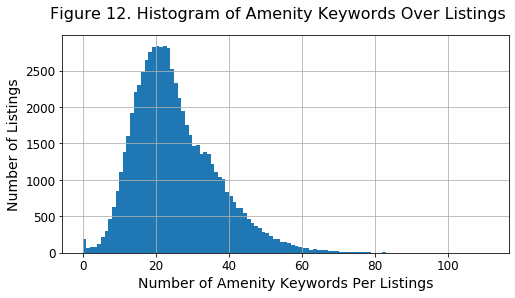

In [56]:
fig12, ax12 = plt.subplots(figsize=(8, 4))

amenities_df.sum(axis=1).hist(ax=ax12, bins=amenities_df.sum(axis=1).max())
ax12.set_xlabel('Number of Amenity Keywords Per Listings')
ax12.set_ylabel('Number of Listings')
fig12.suptitle('Figure 12. Histogram of Amenity Keywords Over Listings');

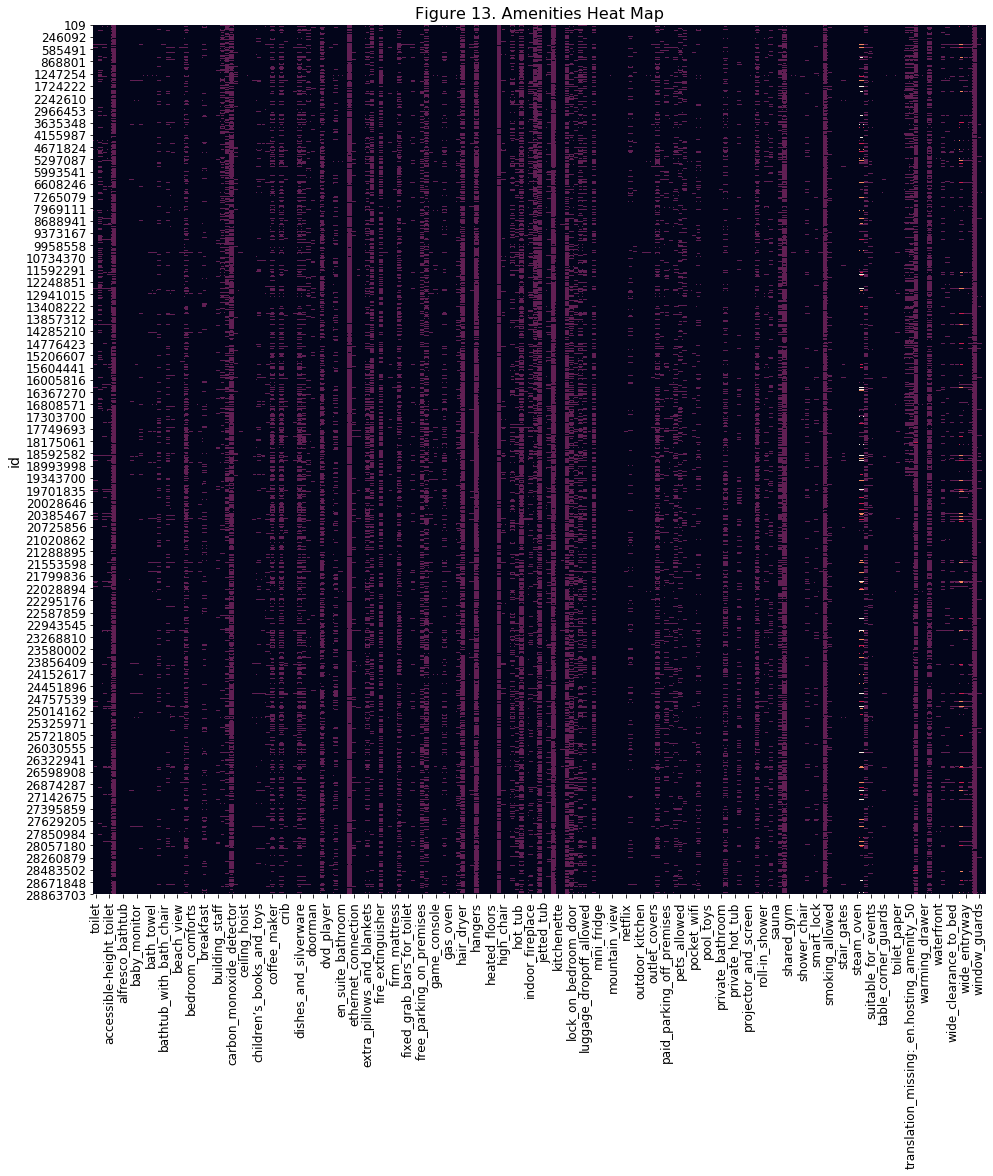

In [57]:
fig13, ax13 = plt.subplots(figsize=(16, 16))
ax13 = sns.heatmap(amenities_df, cbar=False)
ax13.set_title('Figure 13. Amenities Heat Map', fontsize=16);

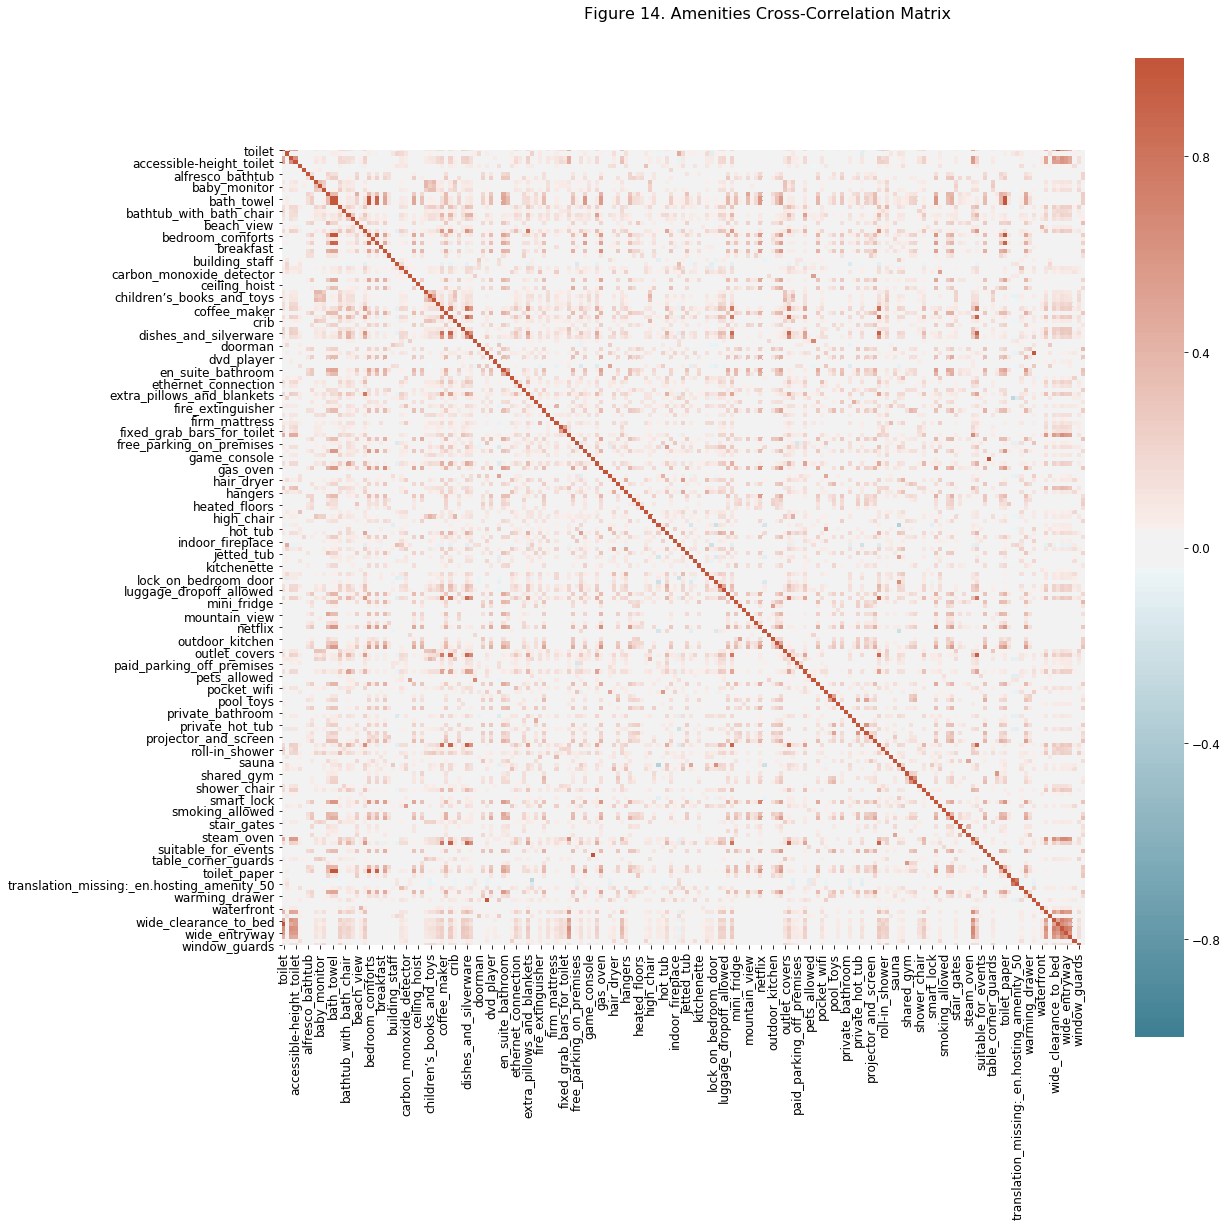

In [58]:
fig14, ax14 = plt.subplots(figsize=(18, 18))
ax14 = sns.heatmap(amenities_df.corr(), ax=ax14,
                   vmin=-1, vmax=1, annot=False, square=True,
                   cmap=sns.diverging_palette(220, 20, n=200))
fig14.suptitle('Figure 14. Amenities Cross-Correlation Matrix', y=0.92);

### Data Preparation Summary

We have performed the following cleaning and feature engineering steps:

- **Delete missing/mismatched values**
  - Drop mismatched dates between Los Angeles and New York calendars
  - Drop listings that were not available for the entire available time interval
  - Drop super-expensive listings above \$20,000 per night
  - Drop listings for which average listing price calculated using **`calendar`** data set is not available
  - Drop 0.2\% of listings with missing numerical feature values
- **Feature Engineering**
  - *`listing_price_bin`*: Median listing price bin: listing median price <= \\$564 and listing median price > \$564 for exploratory analysis
  - *`amenities`*: 197 features  
      
**Output**:
- **`calendar`**: clean data set containing daily availability and pricing per listing
- **`listings`**: clean listings data with generated listing_price_bin and amenities features

## Modeling and Evaluation
In this section we will perform exploratory analysis and price modeling to answer questions we have outlines in the **Business Understanding** section above. 
  
For convenience for the entire section below we will define the level of granularity of the analysis by subgroup for each city and listing median price bins:

In [59]:
subgroups = ['city', 'listing_price_bin']
print('Sub-groups:', subgroups)
print('Price bins:', price_bins)

Sub-groups: ['city', 'listing_price_bin']
Price bins: ['median <= $564.0', 'median > $564.0']


In [60]:
# define which listing features we will examine
size_features = ['accommodates', 'bedrooms', 'bathrooms', 'beds']
type_features = ['property_type', 'room_type']
property_features = size_features + type_features

In this analysis, we focus on comparison of mean values between Los Angeles and New York for a price and listing properties. In order to understand if any observed differences between distribution means are statistically significant, we perform the following statistical tests, based on distribution properties:
- **Very large sample size distributions** - use **Effect Size** tests to estimate significance of observed differences. For large sample sizes, significance testing framework (aka T-test) may result in false positive errors since probability of finding values on far tail-ends (CI>>95% or p-value<<0.05) of a very large sample size are non-negligible. Thus, even small differences between large samples are likely to come up as significant when using t-test simply due to sample size [7]
  - *Non-normal sample distributions* - use **Cliff's delta** [8] test to estimate effect size
  - *Normal sample distributions* - use **Cohen's D** [9] test to estimate effect size
- **Small size distributions**: use significance testing to evaluate significance of observed differences
  - *Normal distributions with equal variances* - use independent t-test [10]
  - *Non-normal distributions with equal variances* - use Kruskal-Wallis H-test [11]
  - *Unequal variances* - use Welch's t-test [12]

Statistical comparison of listing properties between Los Angeles and New York are performed with the use of the following helper functions:

In [61]:
def category_level_pcount(df, column, subgroups, topk=None):
    """Return column category level count as percent of total count for each subgroup
    
    Args:
        df(pd.DataFrame): input dataframe
        column(str): column name for counting category level percentages
        subgroups([str]): list of subgrouping column names
        topk(int): return only topk results for each subgroup
        
    Returns:
        agg(pd.DataFrame): frame containing category level percent counts for each subgroup
    """
    # get subgroup counts
    subgroup_counts = df.groupby(subgroups)[column]\
                        .agg(subgroup_count=(column, 'count'))\
                        .reset_index()
    
    agg = df.groupby(subgroups + [column])[column]\
            .agg(level_count=(column, 'count'))\
            .reset_index()\
            .merge(subgroup_counts, on=subgroups)
    
    agg['level_pcount'] = 100.0 * agg.level_count / agg.subgroup_count
    
    if topk is not None:
        agg = agg.sort_values(subgroups + ['level_pcount'], ascending=False)\
                 .groupby(subgroups).head(topk).set_index(subgroups).reset_index()
    
    return agg

def is_equal_variance(d1, d2, alpha=0.05):
    """Performs stats.levene test on two input distributions.
    
    Args:
        d1, d2(np.array): input distributions
    
    Returns:
        (bool): true if variances between input distributions are equal, false otherwise. 
    """
    # check if variances are equal
    
    W, p = stats.levene(d1, d2)
    if p <= alpha:
        print(f'Group variances are unequal: W={W:.4f}, p={p:.2e}')
        return False
        
    else:
        print(f'Group variances are equal: W={W:.4f}, p={p:.2e}')
        return True

def are_normal(d1, d2, alpha=0.05):
    """Performs stats.normaltest test on two input distributions.
    
    Args:
        d1, d2(np.array): input distributions
    
    Returns:
        (bool): true if variances between input distributions are equal, false otherwise. 
    """
    # Check if group distributions are normal
    
    for d in [d1, d2]:
        k2, p = stats.normaltest(d)
        if p <= alpha:
            print(f'Sample distribution is not normal.')
            return False
    return True


def cohens_d(d1, d2):
    """Return Cohen's D for two normal distributions.
    
    cohens_d = (mean(d1) - mean(d2)) / pooled standard deviation
    
    Interpretations are found at 
    
    Args:
        d1, d2 (np.array): input distributions
        
    Returns:
        cohens_d (float)
        interpretation (str): interpretation of Cohen's D
    """
    
    # calculate the pooled standard deviation
    pooled_std = sqrt(((len(d1) - 1) * d1.var(ddof=1) + (len(d2) - 1) * d2.var(ddof=1)) 
                      / (len(d1) + len(d2) - 2))
    
    # calculate the effect size
    cohens_d = abs(d1.mean() - d2.mean())/ pooled_std
    
    # Interpret cohen's d
    if 0 <= cohens_d < 0.1:
        effect = "very vmall"
    elif 0.1 <= cohens_d < 0.35:
        effect = "small"
    elif 0.35 <= cohens_d < 0.65:
        effect = "medium"
    elif 0.65 <= cohens_d < 0.9:
        effect = "large"
    elif cohens_d >= 0.9:
        effect = "very large"
    
    interpretation = f'Cohen\'s D between groups corresponds to {effect} size.'
    
    return cohens_d, interpretation

def cliffs_delta(d1, d2):
    """Return Cliff's delta for two distributions.
    
    delta =  (# samples(d1 > d2) - # samples(d2 > d1)) / (n1 * n2),
    where n1 and n2 are sample sizes
    
    delta = 2 * U / (n1 * n2) - 1,
    where U is the Mann-Whitney U statistic
    
    Args:
        d1, d2 (np.array)
        
    Returns:
        delta (float): Cliff's delta
        interpretation (str): interpretation of Cliff's delta
    """
    U, p = stats.mannwhitneyu(d1, d2)
    # print(f'Mann-Whitney U={U}, p={p:.2e}')
    delta = abs(2 * U / (len(d1) * len(d2)) - 1)
    
    # Interpret cliff's delta
    if 0 <= delta < 0.2:
        effect = 'small effect'
    elif 0.2 <= delta < 0.4:
        effect = 'medium effect'
    elif delta >= 0.4:
        effect = 'large effect'
    
    interpretation = f'Cliff\'s Delta between group means corresponds to {effect} size.'
    
    return delta, interpretation

def effect_size_test(d1, d2):
    
    normal = are_normal(d1, d2, alpha=0.05)
    
    if normal:
        statistic, interpretation = cohens_d(d1, d2)
    else:   
        statistic, interpretation = cliffs_delta(d1, d2)
    
    return statistic, interpretation

def t_test(d1, d2, alpha=0.05):
    """Perform t-test on two distributions
           Normal and equal variance: independent t-test
           Normal and unequal variance: Welch's t-test
           Non-normal and unequal variance: Welch's t-test
           Non-normal and equal variance: Kruskal-Wallis H-test
    Args:
        d1, d2 (np.array)
        alpha (float): significance level
        
    Returns:
        statistic (float): test statistic
        p (float): marginal significance
        interpretation (str): interpretation of results
    """
    # check of equal variance
    equal_var = is_equal_variance(d1, d2, alpha=alpha)
    
    # check if group values are normally distributed
    normal = are_normal(d1, d2, alpha=alpha)    
    
    # Select appropriate test
    if not normal and not equal_var:
        print('Welch\'s t-test on non-normally distributed groups with unequal variances:')
        statistic, p = stats.ttest_ind(d1, d2, equal_var=equal_var)
    elif not normal and equal_var:
        print('Kruskal-Wallis H-test:')
        statistic, p = stats.kruskal(d1, d2, equal_var=equal_var)
    else:
        print('Independent T-test:')
        statistic, p = stats.ttest_ind(d1, d2, equal_var=equal_var)    
    
    # T-test interpretation 
    significant = 'statistically significant' if p <= alpha else 'not statistically significant'
    interpretation = f'Difference between group means is {significant}.'
    
    return statistic, p, interpretation

def compare_group_means(df, column, group, test='t_test'):
    """Performs group means comparison for 2-level group
       - Test for data normality
       - Test for equal variances between groups
       
         * Effect Size test
             Normal: Cohen's D
             Non-normal: Cliff's delta
    
    Args:
        df (pd.DataFrame): input DataFrame
        column (str): column name for values on for which comparison is performed 
        group (str): grouping column name
        test (str): - 't_test': independent t-test
                    - 'effect_size': cohen's d test for normally distributed data; cliff's delta otherwise

    Returns:
        None
    """
    
    # drop missing and infinite values
    df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=[column], how='any', axis=0)
    
    # check that group is 2-level
    group_levels = df[group].unique()
    assert len(group_levels) == 2, ('Error: Number of group levels does not equal 2.')
    
    # split data into groups
    gb = df.groupby(group)
    d1, d2 = [gb.get_group(x)[column].to_numpy() for x in gb.groups]
    
    # aggregate statistics
    result_df = gb[column].agg(['count', 'mean', 'median', 'std'])
    display(result_df)
    
    # calculate difference between group means
    diff = result_df['mean'][0] - result_df['mean'][1]
    diffp = 100.0 * abs(diff) / result_df['mean'][0]
    print(f'Difference between groups is {diff:.4f}({diffp:.2f}%)')
         
    # Perform t-test
    if test == 't_test':
        statistic, p, interpretation = t_test(d1, d2, alpha=0.5)
        print(f'{interpretation} Statistic={statistic:.4f}, p-value={p:.2e}')
    elif test == 'effect_size':
        statistic, interpretation = effect_size_test(d1, d2)
        print(f'{statistic:.4f} {interpretation}')
        

We are now ready to perform the analysis.

### Question 1: Are there differences in the types and sizes of listings between Los Angeles and New York?
We answer this question by examining listing property and room types and listing size related features:

In [62]:
listing_properties = calendar.rename(columns={'listing_id': 'id'}).set_index('id')\
                             .groupby(['id', 'city', 'listing_price_bin'])\
                             .agg(price_median=('price', 'median'),
                                  price_mean=('price', 'mean')).reset_index()\
                             .merge(listings[property_features], on='id').set_index('id')
# add price per bedroom
listing_properties['price_median_per_bedroom'] = (listing_properties.price_median 
                                                  / listing_properties.bedrooms)
listing_properties['price_mean_per_bedroom'] = (listing_properties.price_mean 
                                                / listing_properties.bedrooms)

listing_properties.head()

,city,listing_price_bin,price_median,price_mean,accommodates,bedrooms,bathrooms,beds,property_type,room_type,price_median_per_bedroom,price_mean_per_bedroom
id,,,,,,,,,,,,
109,los angeles,median <= $564.0,127.0,126.157895,6,2.0,2.0,3.0,Condominium,Entire home/apt,63.5,63.078947
344,los angeles,median <= $564.0,174.0,175.500000,6,3.0,1.0,3.0,House,Entire home/apt,58.0,58.500000
2515,new york,median <= $564.0,89.0,82.345161,3,1.0,1.0,2.0,Apartment,Private room,89.0,82.345161
2539,new york,median <= $564.0,149.0,154.697222,4,1.0,1.0,3.0,Apartment,Private room,149.0,154.697222
2595,new york,median <= $564.0,237.5,229.979651,2,0.0,1.0,1.0,Apartment,Entire home/apt,inf,inf


,city,listing_price_bin,level_count,subgroup_count,level_pcount
0,los angeles,median <= $564.0,34300,36222,94.693832
1,los angeles,median > $564.0,1922,36222,5.306168
2,new york,median <= $564.0,30231,31038,97.399961
3,new york,median > $564.0,807,31038,2.600039


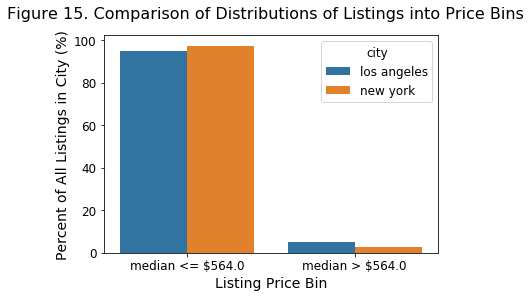

In [63]:
# Count compare ditribution of listings into price bins between cities
price_bin_counts = category_level_pcount(df=listing_properties, column='listing_price_bin',
                                         subgroups=['city'])

fig15, ax15 = plt.subplots(figsize=(6, 4))
sns.catplot(x='listing_price_bin', y='level_pcount', hue='city',
            kind='bar', data=price_bin_counts, ax=ax15)
ax15.set_xlabel('Listing Price Bin')
ax15.set_ylabel('Percent of All Listings in City (%)')
fig15.suptitle('Figure 15. Comparison of Distributions of Listings into Price Bins')
plt.close(2);
display(price_bin_counts)

Note that compared with New York, Los Angeles dataset contains approximately 5000 more listings with a slightly higher proportion of high-priced listings at 5.3\% of all listings versus 2.6\% in the New York dataset.

In order to avoid differences the number of listings and the distribution among price bins between Los Angeles and New York, we compare listing properties in relative terms as percent of all listings city/price bin subgroup. 

,city,listing_price_bin,property_type,level_count,subgroup_count,level_pcount
10,los angeles,median <= $564.0,House,11294,34300,32.927114
9,los angeles,median <= $564.0,Apartment,12684,34300,36.979592
0,new york,median > $564.0,Apartment,400,807,49.566295
8,los angeles,median > $564.0,Apartment,128,1922,6.659729
5,new york,median <= $564.0,Townhouse,1277,30231,4.224141


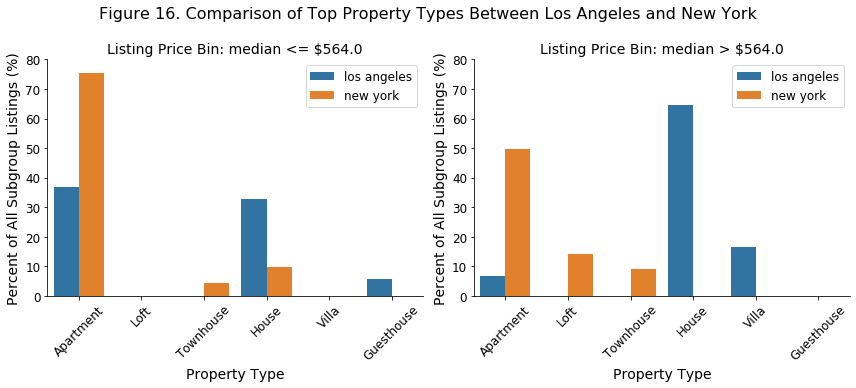

In [64]:
top_property_types = category_level_pcount(df=listing_properties, column='property_type', 
                                           subgroups=subgroups, topk=3)

ax16 = sns.catplot(x='property_type', y='level_pcount', hue='city', col='listing_price_bin',
                   hue_order=cities, col_order=price_bins,
                   kind='bar', data=top_property_types, sharey=False, legend=False, height=5, aspect=1.2)
for ax, price_bin in zip(ax16.axes.flat, price_bins):
    ax.set_title('Listing Price Bin: ' + price_bin)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel('Percent of All Subgroup Listings (%)')
    ax.set_xlabel('Property Type')
    ax.set_ylim(0, 80)
    ax.legend(loc=1)
ax16.fig.suptitle('Figure 16. Comparison of Top Property Types Between Los Angeles and New York', y=1.07)
ax16.fig.tight_layout();

top_property_types.sample(5, random_state=RANDOM_STATE)

,city,listing_price_bin,room_type,level_count,subgroup_count,level_pcount
10,los angeles,median <= $564.0,Private room,12023,34300,35.052478
9,los angeles,median <= $564.0,Entire home/apt,20580,34300,60.000000
0,new york,median > $564.0,Entire home/apt,706,807,87.484511
8,los angeles,median > $564.0,Shared room,15,1922,0.780437
5,new york,median <= $564.0,Shared room,811,30231,2.682677


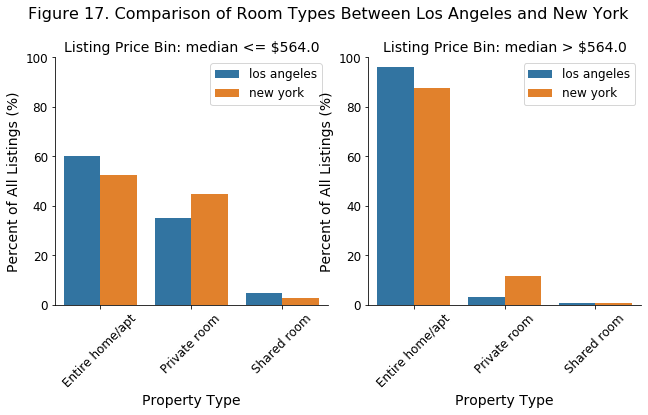

In [65]:
top_room_types = category_level_pcount(df=listing_properties, column='room_type', 
                                       subgroups=subgroups, topk=5)

ax17 = sns.catplot(x='room_type', y='level_pcount', hue='city', col='listing_price_bin',
                   hue_order=cities,  col_order=price_bins, height=4.5, aspect=1,
                   kind='bar', data=top_room_types, sharey=False, legend=False)
for ax, price_bin in zip(ax17.axes.flat, price_bins):
    ax.set_title('Listing Price Bin: ' + price_bin)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel('Percent of All Listings (%)')
    ax.set_xlabel('Property Type')
    ax.set_ylim(0, 100)
    ax.legend(loc=1)
ax17.fig.suptitle('Figure 17. Comparison of Room Types Between Los Angeles and New York', y=1.07);

top_room_types.sample(5, random_state=RANDOM_STATE)

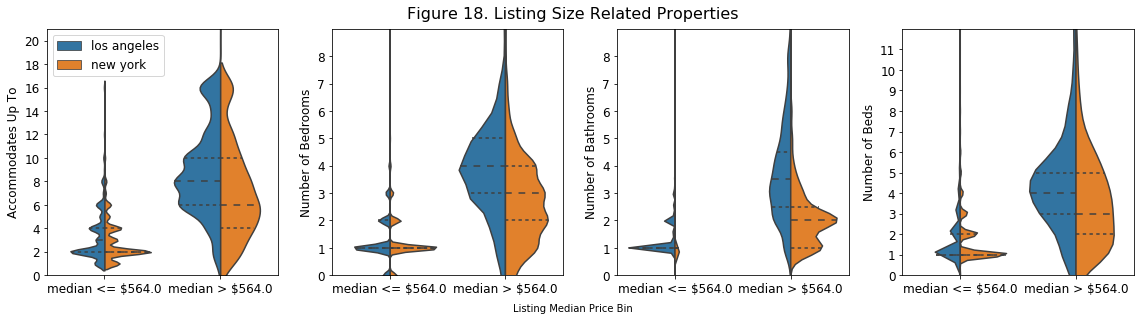

In [66]:
fig18_params = {
        # col_name: (y-axis label, (ticks_start, ticks_end, ticks_step))
        'accommodates': ('Accommodates Up To', (0, 21, 2)),
        'bedrooms': ('Number of Bedrooms', (0, 9, 1)),
        'bathrooms': ('Number of Bathrooms', (0, 9, 1)),
        'beds': ('Number of Beds', (0, 12, 1))}

fig18, ax18 = plt.subplots(1, 4, figsize=(16, 4))

for ax, listing_property in zip(ax18, fig18_params.keys()):
    yaxis_label, (ticks_start, ticks_end, num_ticks) = fig18_params[listing_property]
    ax = sns.violinplot('listing_price_bin', listing_property, inner='quartiles',
                        data=listing_properties, hue='city', ax=ax, split=True, hue_order=cities)
    ticks = np.arange(ticks_start, ticks_end, num_ticks)
    ax.set_yticks(ticks) 
    ax.set_yticklabels(ticks)
    ax.set_xticklabels(price_bins)
    ax.set_ylabel(yaxis_label, fontsize=12)
    ax.set_ylim(ticks_start, ticks_end)
    ax.set_xlabel('')
    ax.get_legend().remove()
ax18[0].legend(loc=2, fontsize=12)
fig18.text(0.5, -0.02, 'Listing Median Price Bin', ha='center')
fig18.tight_layout()
fig18.suptitle('Figure 18. Listing Size Related Properties', y=1.04);

In [67]:
print('Comparison of size related listing properties between Los Angeles and New York.\n')
for listing_property in size_features:
    print(f'{listing_property.title()}:'
          f'\n==========================')
    for price_bin in price_bins:
        df = listing_properties[listing_properties.listing_price_bin==price_bin]
        print(f'Price bin {price_bin}:')
        compare_group_means(df=df, column=listing_property, group='city', test='effect_size')
        print('\n')
    print('--------------------------------------------\n')
    

Comparison of size related listing properties between Los Angeles and New York.

Accommodates:
Price bin median <= $564.0:


,count,mean,median,std
city,,,,
los angeles,34300,3.478776,3,2.351794
new york,30231,2.987364,2,1.897516


Difference between groups is 0.4914(14.13%)
Sample distribution is not normal.
0.1118 Cliff's Delta between group means corresponds to small effect size.


Price bin median > $564.0:


,count,mean,median,std
city,,,,
los angeles,1922,8.858481,8,3.722374
new york,807,7.266419,6,4.056628


Difference between groups is 1.5921(17.97%)
Sample distribution is not normal.
0.2555 Cliff's Delta between group means corresponds to medium effect size.


--------------------------------------------

Bedrooms:
Price bin median <= $564.0:


,count,mean,median,std
city,,,,
los angeles,34300,1.292391,1.0,0.884387
new york,30231,1.196487,1.0,0.746119


Difference between groups is 0.0959(7.42%)
Sample distribution is not normal.
0.0485 Cliff's Delta between group means corresponds to small effect size.


Price bin median > $564.0:


,count,mean,median,std
city,,,,
los angeles,1922,3.830385,4.0,1.97231
new york,807,2.679058,3.0,1.67890


Difference between groups is 1.1513(30.06%)
Sample distribution is not normal.
0.4054 Cliff's Delta between group means corresponds to large effect size.


--------------------------------------------

Bathrooms:
Price bin median <= $564.0:


,count,mean,median,std
city,,,,
los angeles,34300,1.342449,1.0,0.705747
new york,30231,1.137657,1.0,0.500575


Difference between groups is 0.2048(15.26%)
Sample distribution is not normal.
0.1522 Cliff's Delta between group means corresponds to small effect size.


Price bin median > $564.0:


,count,mean,median,std
city,,,,
los angeles,1922,3.725546,3.5,1.828540
new york,807,2.081784,2.0,1.184894


Difference between groups is 1.6438(44.12%)
Sample distribution is not normal.
0.5990 Cliff's Delta between group means corresponds to large effect size.


--------------------------------------------

Beds:
Price bin median <= $564.0:


,count,mean,median,std
city,,,,
los angeles,34300,1.936006,1.0,1.684359
new york,30231,1.657504,1.0,1.108112


Difference between groups is 0.2785(14.39%)
Sample distribution is not normal.
0.0798 Cliff's Delta between group means corresponds to small effect size.


Price bin median > $564.0:


,count,mean,median,std
city,,,,
los angeles,1922,4.531738,4.0,2.777593
new york,807,3.788104,3.0,2.952638


Difference between groups is 0.7436(16.41%)
Sample distribution is not normal.
0.2088 Cliff's Delta between group means corresponds to medium effect size.


--------------------------------------------



#### Model Results

**Figure 16** shows that the lower median price bin listings in New York are predominantly apartments, while in Los Angeles they are closely split between apartments and houses. Half of the high median price listings in New York are still apartments with the other half split between lofts, townhouses and houses. Los Angeles high median price listings, on the other hand, are mostly houses (including large houses, aka villas). This is consistent with the differences in real estate markets between Los Angeles and New York, where most of New York residential real estate is apartments and condominiums.

**Figure 17** illustrates that the distribution of room types for both cities is similar -- split between entire homes/apartments and private rooms for lower median-price listings; and predominantly entire homes/apartments for high median-price listings.

**Figure 18** and related table demonstrates that lower median price listings (<=\$564.00) are similar in size between Los Angles and New York with median one bedroom, one bathroom, and one bed with per listing. However, more expensive listings are in all respects larger in Los Angeles where median listing is able to accommodate up to 8 people in 4 bedrooms, 3.5 bathrooms and 4 beds versus New York where median listing is  able to accommodate up to 6 people in 3 bedrooms, 2 bathrooms and 3 beds.


#### Model Evaluation
We have calculated the differences in listing sizes between the two cities. But how significant were those differences? After performing the Cliff's delta test estimating effect significance (see tables above) we demonstrated that there are **no significant differences** in property sizes for **median prices listings <= \$564** between Los Angeles and New York. On the other hand, for **median prices listings > \$564**, properties in Los Angeles appear to be **significantly larger** in number of people a property can accommodate, the number of bedrooms, beds, and bathrooms. 

### Question 2: Are there differences in offered amenities?
To answer this question we work with the **`amenities_df`** frame of feature that we have engineered above.

In [68]:
# count number of listing amenities for each listing
amenities_df['count'] = amenities_df.sum(axis=1)

In [69]:
# add price bin and city column for analysis
amenities_df = amenities_df.merge(listing_properties[subgroups], on='id')

In [70]:
amenities_df.head()

,toilet,24-hour_check-in,accessible-height_bed,accessible-height_toilet,air_conditioning,air_purifier,alfresco_bathtub,amazon_echo,baby_bath,baby_monitor,babysitter_recommendations,balcony,bath_towel,bathroom_essentials,bathtub,bathtub_with_bath_chair,bbq_grill,beach_essentials,beach_view,beachfront,bed_linens,bedroom_comforts,bidet,body_soap,breakfast,breakfast_table,brick_oven,building_staff,buzzer/wireless_intercom,cable_tv,carbon_monoxide_detector,cat(s),ceiling_fan,ceiling_hoist,central_air_conditioning,changing_table,children’s_books_and_toys,children’s_dinnerware,cleaning_before_checkout,coffee_maker,convection_oven,cooking_basics,crib,day_bed,disabled_parking_spot,dishes_and_silverware,dishwasher,dog(s),doorman,double_oven,...,sauna,self_check-in,shampoo,shared_gym,shared_hot_tub,shared_pool,shower_chair,single_level_home,ski-in/ski-out,smart_lock,smart_tv,smoke_detector,smoking_allowed,soaking_tub,sound_system,stair_gates,stand_alone_steam_shower,standing_valet,steam_oven,step-free_access,stove,suitable_for_events,sun_loungers,swimming_pool,table_corner_guards,tennis_court,terrace,toilet_paper,touchless_faucets,translation_missing:_en.hosting_amenity_49,translation_missing:_en.hosting_amenity_50,tv,walk-in_shower,warming_drawer,washer,washer_/_dryer,waterfront,well-lit_path_to_entrance,wheelchair_accessible,wide_clearance_to_bed,wide_clearance_to_shower,wide_doorway,wide_entryway,wide_hallway_clearance,wifi,window_guards,wine_cooler,count,city,listing_price_bin
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,32,los angeles,median <= $564.0
344,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,41,los angeles,median <= $564.0
2515,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,32,new york,median <= $564.0
2539,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,44,new york,median <= $564.0
2595,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,36,new york,median <= $564.0


Comparison of number of listed amenities between Los Angeles and New York.
Number of Amenities:
Price bin median <= $564.0:


,count,mean,median,std
city,,,,
los angeles,34300,26.739125,25,11.712557
new york,30231,22.229533,21,9.859047


Difference between groups is 4.5096(16.87%)
Sample distribution is not normal.
0.2337 Cliff's Delta between group means corresponds to medium effect size.


Price bin median > $564.0:


,count,mean,median,std
city,,,,
los angeles,1922,30.093652,27,14.375770
new york,807,26.215613,25,11.914526


Difference between groups is 3.8780(12.89%)
Sample distribution is not normal.
0.1408 Cliff's Delta between group means corresponds to small effect size.


--------------------------------------------



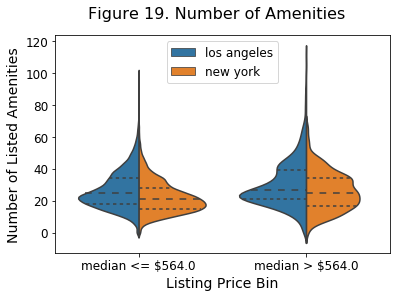

In [71]:
print('Comparison of number of listed amenities between Los Angeles and New York.\n'
      f'Number of Amenities:'
      f'\n==========================')
for price_bin in price_bins:
    df = amenities_df[amenities_df.listing_price_bin==price_bin]
    print(f'Price bin {price_bin}:')
    compare_group_means(df=df, column='count', group='city', test='effect_size')
    print('\n')
print('--------------------------------------------\n')

fig19, ax19 = plt.subplots()

sns.violinplot(x='listing_price_bin', y='count', data=amenities_df, hue='city', hue_orer=cities,
               split=True, inner='quartile', ax=ax19)
ax19.set_xlabel('Listing Price Bin')
ax19.set_ylabel('Number of Listed Amenities')
ax19.legend(loc=9)
fig19.suptitle('Figure 19. Number of Amenities');

#### Model Results
**Figure 19** shows that hosts in Los Angeles list about 4 more amenities on average than hosts in New York.

#### Model Evaluation
The table comparing number of listing amenities shows that the difference has a medium size effect (somewhat significant) for lower price listings (price bin <= \$564). On the other hand, the broader distribution of larger price listings diminishes the significance of the difference to low size effect.

Finally, let's look at the most listed amenities in both cities:

In [72]:
amenities_topk = 5  # list only topk

# most frequently listed amenities for each city, listing_price_bin subgroup
top_amenities = amenities_df.drop(columns=['count'])\
                            .groupby(subgroups).sum(axis=0).stack()\
                            .groupby(subgroups, group_keys=False).nlargest(amenities_topk)\
                            .reset_index().rename(columns={'level_2': 'amenity', 0: 'count'})\
                            .merge(price_bin_counts[subgroups + ['level_count']], on=subgroups)
top_amenities['pcount'] = 100.0 * top_amenities['count'] / top_amenities['level_count']
top_amenities.head()

,city,listing_price_bin,amenity,count,level_count,pcount
0,los angeles,median <= $564.0,wifi,33461,34300,97.553936
1,los angeles,median <= $564.0,essentials,32672,34300,95.253644
2,los angeles,median <= $564.0,smoke_detector,31231,34300,91.052478
3,los angeles,median <= $564.0,kitchen,30312,34300,88.373178
4,los angeles,median <= $564.0,heating,30154,34300,87.912536


In [73]:
# Order amenities in descending order by the average between two cities percentage count for each price bin
top_amenities_order = top_amenities.groupby(['amenity', 'listing_price_bin'])\
                                   .agg(pcount_ave=('pcount', 'mean'))\
                                   .sort_values(['listing_price_bin', 'pcount_ave'], 
                                                ascending=[True,False])\
                                   .reset_index()

top_amenities_order

,amenity,listing_price_bin,pcount_ave
0,wifi,median <= $564.0,97.718452
1,essentials,median <= $564.0,94.570357
2,smoke_detector,median <= $564.0,91.052478
3,heating,median <= $564.0,91.033771
4,kitchen,median <= $564.0,89.899599
5,air_conditioning,median <= $564.0,87.972611
6,wifi,median > $564.0,97.183883
7,heating,median > $564.0,95.539033
8,kitchen,median > $564.0,94.713111
9,air_conditioning,median > $564.0,93.432466


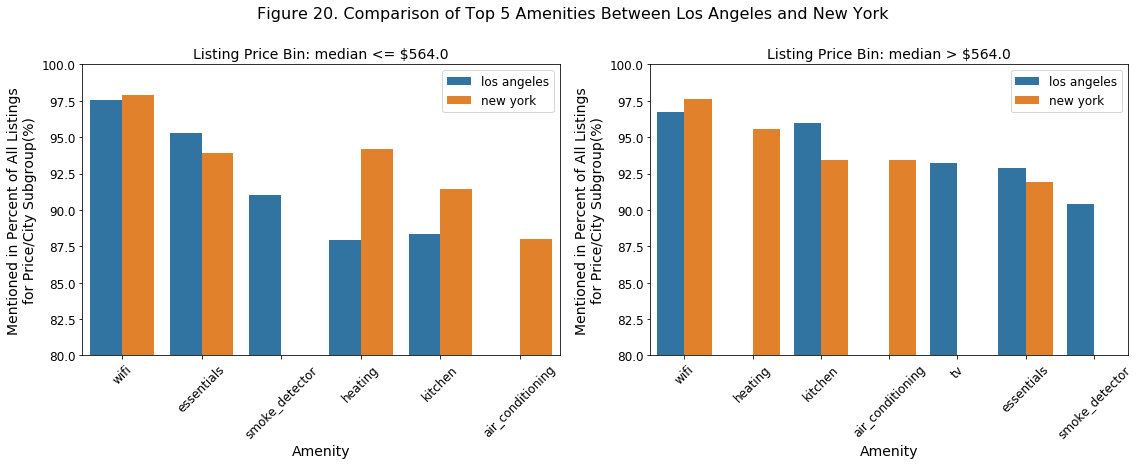

In [74]:
fig20, ax20 = plt.subplots(1, 2, figsize=(16, 6))
for ax, price_bin in zip(ax20, price_bins):
    data = top_amenities[top_amenities.listing_price_bin==price_bin]
    order = top_amenities_order[top_amenities_order.listing_price_bin==price_bin]['amenity']
    sns.barplot(x='amenity', y='pcount', hue='city', hue_order=cities, order=order, 
                data=data, ax=ax)
    ax.set_title('Listing Price Bin: ' + price_bin)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel('Mentioned in Percent of All Listings\nfor Price/City Subgroup(%)')
    ax.set_xlabel('Amenity')
    ax.set_ylim(80, 100)
    ax.legend(loc=1)
fig20.suptitle(f'Figure 20. Comparison of Top {amenities_topk} '
                  f'Amenities Between Los Angeles and New York', y=1.07)
fig20.tight_layout();

**Figure 20** above illustrates that "wifi" is the most listed amenity for both cities, with "kitchen" and "essentials" showing up in top 5 for each city regardless of median listing price. Unsurprisingly, "heating" is a commonly listed amenity in New York, considering the cold climate in the winter. What is surprising however, is that while "air conditioning" is in the top 5 listed amenities for New York, it is not one of the top 5 in Los Angeles! Instead, it appears that listing "smoke detector" as an amenity is important for hosts in Los Angeles. Finally, "TV" appears in top 5 listed amenities for higher-price listings in Los Angeles, but not in lower-priced listings or New York (could it be LA Hollywood culture influenced? :) ). 

### Question 3: Do the differences above result in listing price differences?
To answer this question, we look at the average prices for each city, price bin sub-group:

Comparison of listing average prices between Los Angeles and New York.

Price Mean:
----------------------------
Price bin median <= $564.0:


,count,mean,median,std
city,,,,
los angeles,34300,138.83150,108.544827,101.113896
new york,30231,146.08174,118.389610,99.515292


Difference between groups is -7.2502(5.22%)
Sample distribution is not normal.
0.0585 Cliff's Delta between group means corresponds to small effect size.


Price bin median > $564.0:


,count,mean,median,std
city,,,,
los angeles,1922,1473.173565,990.845426,1491.410142
new york,807,1033.188228,767.379310,973.520369


Difference between groups is 439.9853(29.87%)
Sample distribution is not normal.
0.2822 Cliff's Delta between group means corresponds to medium effect size.


Price Mean Per Bedroom:
----------------------------
Price bin median <= $564.0:


,count,mean,median,std
city,,,,
los angeles,30413,98.739123,87.172414,58.491840
new york,27365,113.848488,93.750000,72.282858


Difference between groups is -15.1094(15.30%)
Sample distribution is not normal.
0.1072 Cliff's Delta between group means corresponds to small effect size.


Price bin median > $564.0:


,count,mean,median,std
city,,,,
los angeles,1874,439.570030,285.77494,642.523533
new york,760,522.509443,302.75311,907.801030


Difference between groups is -82.9394(18.87%)
Sample distribution is not normal.
0.0759 Cliff's Delta between group means corresponds to small effect size.




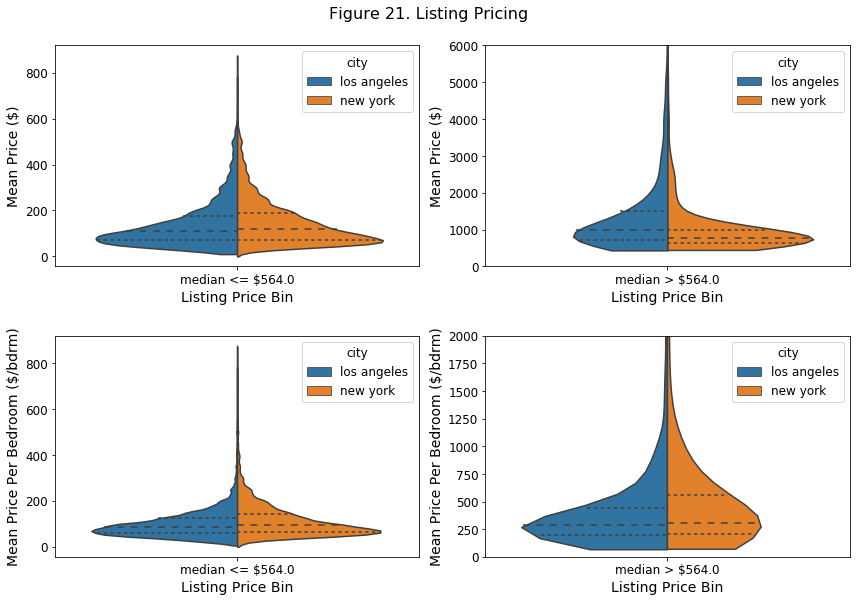

In [75]:
fig21, ax21 = plt.subplots(2, 2, figsize=(12, 8))

ax21 = ax21.flat
idx = 0
for price_type, y_label in zip(['price_mean', 'price_mean_per_bedroom'],
                              ['Mean Price ($)', 'Mean Price Per Bedroom ($/bdrm)']):
    for price_bin in price_bins:
        ax = ax21[idx]
        data = listing_properties[listing_properties.listing_price_bin==price_bin]
        data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=[price_type], how='any', axis=0)
        ax = sns.violinplot(x='listing_price_bin', y=price_type, hue='city',
                            data=data, inner='quartile', split=True, cut=0, hue_order=cities, ax=ax)
        ax.set_ylabel(y_label)
        ax.set_xlabel('Listing Price Bin', fontsize=14)
        idx += 1

ax21[1].set_ylim(0, 6000)
ax21[3].set_ylim(0, 2000)
fig21.suptitle('Figure 21. Listing Pricing', y=1.04)
fig21.tight_layout();

print('Comparison of listing average prices between Los Angeles and New York.\n')
for price in ['price_mean', 'price_mean_per_bedroom']:
    print(f'{price.replace("_", " ").title()}:'
          f'\n----------------------------')
    for price_bin in price_bins:
        df = listing_properties[listing_properties.listing_price_bin==price_bin]
        print(f'Price bin {price_bin}:')
        compare_group_means(df=df, column=price, group='city', test='effect_size')
        print('\n')

#### Model Results

**Figure 21** and the related table show that relative listing property sizes translate fairly well into the listing mean prices: less expensive listings (below \\$564 median price) are very similar between Los Angeles and New York with < 5\% higher overall median price in New York, while the higher proportion of larger listings in Los Angeles results in ~30\% higher overall mean listing price for more expensive listings (above \$564 median price range). Note, however, that if we take the size of the listing out of the equation and look at the **mean price per bedroom**, it turns out that **size normalized high priced listings in Los Angeles are actually 18\% cheaper than New York!** 

**Thus, if you are looking for a luxury vacation and don't mind paying a bit extra for considerably larger accommodations, then Los Angeles gives you more bang for your buck and is the place to go.**

#### Model Evaluation
Looking at the Cliff's delta values for various comparisons in the table above, we note that the only average price difference between cities with statistically significant size effect is the raw average price for high-price listings (median price > \$564) with a medium size effect. All other differences are not statistically significant according to this metric.

### Question 4: Are there differences in the availability and price trends throughout the year? Are some seasons more available and/or less expensive throughout the season. What are the best times to visit each city in terms of price and availability?

When comparing internal trends between sets of values with unequal means it helps to standardize the values by subtracting and then dividing by the mean for each set of values. In effect, instead of using raw values for comparison, look at percent deviation comparison, or perform relative comparison. Since we would like to compare pricing trends over time between two cities, instead of examining raw prices we will look at percent deviation from mean price for each city on any given day. 

In our case, we'll make another subgrouping since we see a large difference in prices between low- and high-median price listings, so we'll sub-group by *`city`* **and** *`listing_price_bin`* groups.

Below we write a function to help generate the daily price and availability trends, **`generate_daily_ave_trends()`**.

In [76]:
def generate_daily_ave_trends(calendar, values=['price', 'availability'], 
                              subgroups=['city', 'listing_price_bin']):
    
    """Return frame containing **daily** raw average and percent deviation from subgroup mean trends
       for each column for each subgroup.
    
    Args:
        calendar(pd.DataFrame): Contains daily records of values for each column in `columns` arg
                            n addition to column names found in func args(columns, subgroups,
                                fixed_over_col), must contain date column
        values([str]): column names for which average trends are to be generated
        subgroups([str]): list of subgrouping column names
                           
    Returns:
        trend(pd.DataFrame): Containing average price trends for each city and price bin subgroup
                                   Columns:
                                   - date
                                   - subgroups
                                   - col_subgroup_ave: average col value for subgroup over the entire time
                                   - col_date_subgroup_ave: average col value for subgroup for each day
                                   - col_pdev: daily col percent deviation from overall subgroup average
    """
    assert 'date' in calendar.columns, 'Error: date column could not be found'
    
    df = calendar
    
    # Overall mean value for columns for each subgroup
    subgroup_ave = df.groupby(subgroups)[values].mean().reset_index()\
                     .rename(columns={col: col + '_subgroup_ave' for col in values})
    
    # Daily mean value for columns for each subgroup
    date_subgroup_ave = df.groupby(['date'] + subgroups)[values].mean().reset_index()\
                          .rename(columns={col: col + '_daily_subgroup_ave' for col in values})
    
    # Merge overall and daily means by subgroups
    trend = subgroup_ave.merge(date_subgroup_ave, on=subgroups)
    
    # Add percent deviation from overall subgroup mean
    for col in values:
        trend[col + '_daily_pdev'] = (100.0 * (trend[col + '_daily_subgroup_ave'] 
                                               - trend[col + '_subgroup_ave']) 
                                      / trend[col + '_subgroup_ave'])
    
    return trend

In [77]:
holidays = {'Thanksgiving': np.datetime64('2018-11-22'),
            'Christmas': np.datetime64('2018-12-25'),
            'New Year': np.datetime64('2019-01-01'),
            'Memorial Day': np.datetime64('2019-05-27'),
            'Labor Day': np.datetime64('2019-09-02')}

def exclude_holiday_weeks(calendar, holidays=holidays):
    """Drops weeks from input calendar that have major US holidays
       or weeks preceeding holidays if holiday falls on Monday or Tuesday.
       
    Args:
        calendar(pd.DataFrame): input calendar dataframe containing `date` column
        holidays({name: np.datetime64}): dict containing holiday names and dates in numpy.datetime64 format
        
    Returns:
        df(pd.DataFrame): output calendar with weeks containing holidays dropped
    """
    df = calendar.copy()
    
    df['week'] = df.date.dt.week  # add week number column to calendar
    
    excluded_weeks = []  # list of week numbers to exclude from weekend/weekday difference analysis
    
    for _, date in holidays.items():
        pd_date = pd.to_datetime(date)  # convert np.datetime64 to pd.date
    
        # exclude holiday week
        holiday_week = pd_date.week  
        excluded_weeks.append(holiday_week)

        # exclude preceeding holiday week if holiday is on Monday or Tuesday
        holiday_day_of_week = pd_date.dayofweek
        if holiday_day_of_week < 2:
            excluded_weeks.append(holiday_week - 1)
    
    df = df[~df.week.isin(excluded_weeks)] 
    
    return df

In [78]:
def drop_fixed_value_groups(df, values, by):
    """Drop fixed-value groups from input dataframe
    
    Args:
        df(pd.DataFrame): input dataFrame
        column(str): column containing values to be examined for variability
        group_key(str): column containing group keys
    
    Return:
        df_out(pd.DataFrame): output dataFrame with removed fixed_value groups   
     
    Example:
    IN:
        df = pd.DataFrame(np.array([[1, 2, A], [4, 2, A], [7, 2, A], 
                                    [3, 4, B], [5, 6, B], [7, 2, B],
                                    [1, 2, C], [1, 3, C], [1, 4, C]]),
                          columns=['col1', 'col2', 'col3'])            
        df
    OUT:
           col1  col2  col3
        0   1     2     A
        1   4     2     A
        2   7     2     A
        3   3     4     B
        4   5     6     B
        5   7     2     B
        6   1     1     C
        7   1     3     C
        8   1     4     C
    
    IN:
        df2 = drop_fixed_value_groups(df, values='col2', by='col3')
        df2
    
    OUT:
           col1  col2  col3
        3   3     4     B
        4   5     6     B
        5   7     2     B    
        6   1     1     C
        7   1     3     C
        8   1     4     C    
    
    """
    agg = df.groupby(by)[values].nunique()
    fixed_value_group_keys = agg[agg==1].index.values
    df = df[~df[by].isin(fixed_value_group_keys)]
    
    return df

In [79]:
def weekend_weekday_diff(calendar, value_col, subgroups=['city', 'listing_price_bin']):
    """Return difference in prices for each week of the calendar for each subgroup
    
    Args:
        calendar(pd.DataFrame): input calendar containing dates, prices and subgroups.
                                Required columns:
                                - date
                                - price
                                - subgrouping columns
        price_col(str): column name containing prices used for comparison                        
        subgroups([str]): list of grouping column names
        
    Returns:
        weekly(pd.DataFrame): average percent difference in weekend-weekday prices
                              for each subgroup for each calendar week
    """
    df = calendar.copy()
    
    # add week number column to calendar, keeping track of the year
    df['week'] = df.date.dt.strftime('%Y-%W')
    
    # add column indicating weekend/weekday
    # Weekend prices actually correspond to Friday (dayofweek=4) and Saturday(dayofweek=5) bookings!!!
    df['weekend'] = np.where((pd.DatetimeIndex(df.date).dayofweek==4) 
                             | (pd.DatetimeIndex(df.date).dayofweek==5), 1, 0)
    
    group_cols = subgroups + ['week', 'weekend']
    index_cols = subgroups + ['week']
    
    # calculate subgroup mean prices for weekdays and weekends for each week
    weekly = df.groupby(group_cols)\
               .agg(ave_price=(value_col, 'mean')).reset_index()\
               .pivot_table(values='ave_price', columns='weekend', index=index_cols).reset_index()\
               .rename(columns={0: 'weekday_price_ave', 1: 'weekend_price_ave'})
    
    # convert absolute difference into percent difference from weekday price
    weekly['price_pdiff'] = (100.0 * (weekly.weekend_price_ave - weekly.weekday_price_ave) 
                             / weekly.weekday_price_ave)
    
    return weekly

In [80]:
def weekend_weekday_diff_pipeline(calendar, subgroups=['city', 'listing_price_bin'],
                                  exclude_fixed_price=False,
                                  exclude_holidays=True, holidays={}):
    
    """Analysis pipeline for evaluating weekend-weekday price differences by input subgroups
    
    Args:
        calendar (pd.DataFrame): calendar frame containing dialy pricing for each listing with
                                 the following required columns: 
                                     'price', 'listing_id', 'city', 'listing_price_bin'
        exclude_fixed_price (bool): exclude listings with fixed price from analysis if True, 
                                    include otherwise
        exclude_holidays
        
    Returns:
        weekly (pd.DataFrame): frame containing weekly weekend-weekday difference 
                               with the following columns:
                                   weekend (float): year week number 
                                   city (str)
                                   listing_price_bin (str)
                                   week (str): week number in YYYY-week number format
                                   weekday_price_ave (float): weekday subgroup average price for the week
                                   weekend_price_ave (float): weekend subgroup average price for the week
                                   price_pdiff (float): weekly weekend-weekday price percent difference =
                                                        100 * (weekend_price_ave - weekday_price_ave) /
                                                               weekday_price_ave
    """
    
    if exclude_fixed_price:
        df = drop_fixed_value_groups(df=calendar, values='price', by='listing_id')
    else:
        df = calendar
        
    trend = generate_daily_ave_trends(calendar=df, values=['price'], 
                                      subgroups=['city', 'listing_price_bin'])
    if exclude_holidays:
        trend = exclude_holiday_weeks(calendar=trend, holidays=holidays)
        
    weekly = weekend_weekday_diff(calendar=trend, value_col='price_daily_subgroup_ave', 
                                           subgroups=subgroups)
    
    return weekly

We're finally ready for the analysis. Let's start by plotting listing availability and price trends through the year comparing relative fluctuations in Los Angeles and New York using data from all listings.

In [81]:
trend_all = generate_daily_ave_trends(calendar=calendar, values=['price', 'available'], 
                                      subgroups=subgroups)

trend_all.sample(5, random_state=RANDOM_STATE)

,city,listing_price_bin,price_subgroup_ave,available_subgroup_ave,date,price_daily_subgroup_ave,available_daily_subgroup_ave,price_daily_pdev,available_daily_pdev
1023,new york,median <= $564.0,149.823428,0.509356,2019-08-01,153.105565,0.465340,2.190670,-8.641574
381,los angeles,median > $564.0,1525.743165,0.693446,2018-10-25,1526.434934,0.746494,0.045340,7.649805
843,new york,median <= $564.0,149.823428,0.509356,2019-02-02,142.946620,0.620915,-4.589942,21.901791
427,los angeles,median > $564.0,1525.743165,0.693446,2018-12-10,1465.949412,0.883117,-3.918992,27.351892
192,los angeles,median <= $564.0,144.410130,0.567777,2019-04-16,147.737869,0.493511,2.304367,-13.080023


We plot the price trends distinguishing between cities and listing median price bins. We also mark major US holidays and seasons of the year [6] for easier visualization.

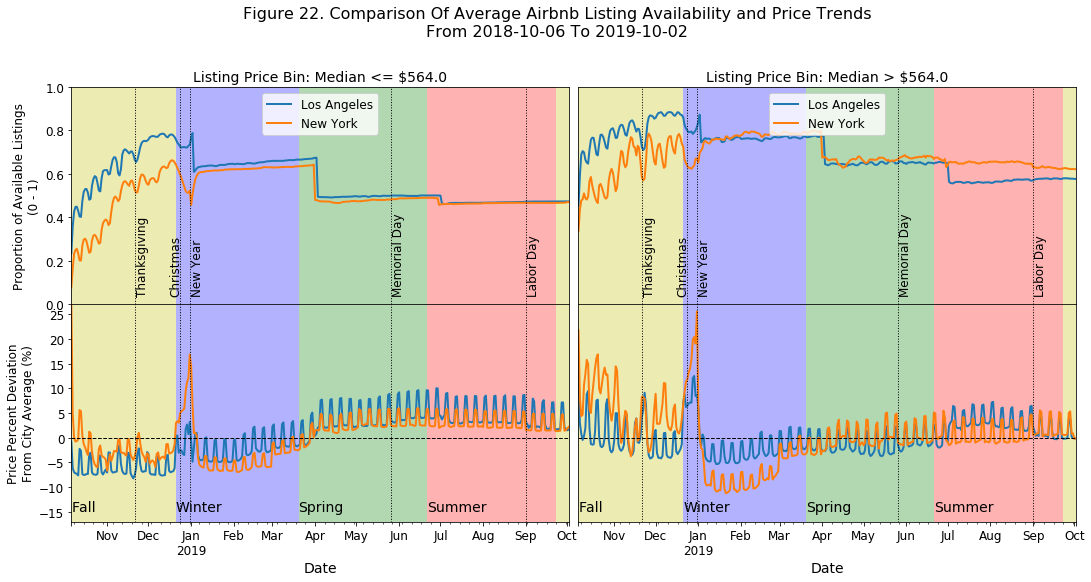

In [82]:
fig22 = plt.figure(figsize=(18, 8), constrained_layout=False)

# Setup grid layout
outer_grid = fig22.add_gridspec(1, 2, wspace=0.02, hspace = 0)
for i in range(2):
    inner_grid = outer_grid[i].subgridspec(2, 1, wspace=0, hspace=0)
    for j in range(2):
        fig22.add_subplot(inner_grid[j])

# Get axes
ax22 = fig22.get_axes()

# Plot for each price bin
for idx, price_bin in enumerate(price_bins):
    
    # Graph index shortcuts
    ax_av = ax22[2 * idx]  # avilability graph
    ax_price = ax22[2 * idx + 1]  # price graph
    
    # Axes transform for text labels
    transform_av = ax_av.get_xaxis_transform()  
    transform_price = ax_price.get_xaxis_transform()  
    
    # Plot availability and price trends for each city
    for city, color in zip(cities, ['C0', 'C1']):
        
        # Subset data
        data = trend_all[(trend_all.listing_price_bin==price_bin) & (trend_all.city==city)]
        
        # Plot Listing Availability
        data.plot(x='date', y='available_daily_subgroup_ave', color=color, linewidth=2, ax=ax_av)
        
        # Plot Price Percent Deviation from City Mean Price
        data.plot(x='date', y='price_daily_pdev', color=color, legend=False, linewidth=2, 
                  ax=ax_price)    
        
    # Decorate axes, legends, titles
    ax_av.set_title(f'Listing Price Bin: {price_bin.capitalize()}')
    ax_av.legend([x.title() for x in cities], loc=9)
    ax_av.axes.get_xaxis().set_visible(False)
    ax_av.set_ylim(0, 1)
    ax_price.set_xlabel('Date')
    ax_price.set_ylim(-17, 27)
    
    # Add dashed line at 0% price deviation
    ax_price.axhline(y=0, color='k', linestyle='dashed', linewidth=1)

    # Shade seasonal regions
    # Seaons start around 20th of the months instead of the 1st [6]
    season_cuts = [data.date.min().date(), 
                   np.datetime64('2018-12-21'),
                   np.datetime64('2019-03-20'),
                   np.datetime64('2019-06-21'),
                   np.datetime64('2019-09-23'),
                   data.date.max().date()]
    season_colors = ['y', 'b', 'g', 'r', 'y']
    
    for start, end, season_color in zip(season_cuts[:-1], season_cuts[1:], season_colors):
        ax_av.axvspan(start, end, facecolor=season_color, alpha=0.3)
        ax_price.axvspan(start, end, facecolor=season_color, alpha=0.3)

    # Add season labels
    for name, offset in zip(['Fall', 'Winter', 'Spring', 'Summer'], season_cuts[:-1]):
        ax_price.text(offset, 0.05, name, rotation=0, color='k', transform=transform_price, fontsize=14)
    
    # Add holiday markers
    for name, date in holidays.items():
        # boookings for a holiday day are actually booked for the night before
        date -= np.timedelta64(1,'D')
        ax_av.axvline(x=date, color='k', linestyle='dotted', linewidth=1)
        
        # text position offset relative to marker line
        if name == 'Christmas':
            offset = date - np.timedelta64(8, 'D')
        else:
            offset = date + np.timedelta64(1, 'D')

        ax_av.text(offset, 0.05, name, rotation=90, color='k',
                   transform=transform_av, fontsize=12)
        ax_price.axvline(x=date, color='k', linestyle='dotted', linewidth=1)

# Clean up ticks and labels
ax22[0].set_ylabel('Proportion of Available Listings\n(0 - 1)', fontsize=12)
ax22[1].set_ylabel('Price Percent Deviation\nFrom City Average (%)', fontsize=12)
ax22[2].set_yticks([])
ax22[3].set_yticks([])
fig22.suptitle(f'Figure 22. Comparison Of Average Airbnb Listing Availability and Price Trends'
               f'\nFrom {data.date.min().date()} '
               f'To {data.date.max().date()}', y=1.02);

**Figure 22** is rich with insights about availability and price trends throughout the year:
- **Availability**:
  - There is high volatility in the availability for the fall months of 2018. Additionally, the availability for both cities and listing price bins is lower than the rest of the year. **As a result, the integrity of data both in terms of availability and price for this time interval is under question.** Although it is beyond the scope of this analysis, one way to verify data integrity is to compare trends for other years or use data sets scraped on other dates.
  - Overall availability follows very similar trends throughout the year between Los Angeles and New York  with the exception of larger drop in availability in summer months for high median priced listings in Los Angeles as compared with New York 
  - We see clear trends in availability over the seasons: with higher availability in the wintertime at with a sharp drop in spring starting in April and a smaller drop in the summer starting in July
  - We see dips in availability for Thanksgiving and Christmas/New Years, but not other major holidays, for both cities and listing price bins: 
    - There is only a small dip of ~5% in availability for lower median price listings around Thanksgiving
    - There is large dip in availability around Christmas/New Years with New York experience almost double the availability drop as compared with Los Angeles 
- **Prices**:
  - There is an approximately ~5% spikes in average prices on weekends as compared with weekdays for both cities and listing price bins (see more detailed analysis below)
  - Overall prices are about 10% lower in the fall and winter months as compared with spring and summer
  - Lower median price listings
    - Overall, New York prices drop 3-4% more in winter months as compared with Los Angeles
    - For both cities prices peak around end of June, beginning of July
  - Higher median price listings
    - After New Years there is a 10% drop in prices in New York until March with prices holding fairly steady for the remainder of 2019
    - In Los Angeles, on the other hand, prices exhibit smaller dip in winter months of < 5\% until March and show an additional spike of about 5% in July and August
  - It was really surprising to find that of the major US holidays only Thanksgiving and Christmas/New Years holidays exhibited price spike, with no noticeable differences in prices for either the Memorial Day or the Labor Day holidays
    - *Christmas/New Years*
      - New York prices exhibited very large spikes around New Years Day with over 20\% average spike in lower median price listings and ~25\% spike in higher median price listings. (I guess watching the ball drop in Time Square or seeing the big Christmas tree in Rockefeller Center must be worth something!)
      - Los Angeles, on the other hand, showed lower price increases of ~7\% and 15\% for low and high median price listings, respectively
    - *Thanksgiving*
      - Despite dips in listing availability for both cities around Thanksgiving comparable to that around Christmas and New Years the price spikes are smaller than for the other holiday, especially for high median priced listings in New York
  
**We can sure fish out a lot of information from one graph!**

### Question 5: Are there price spikes around weekends? 
When examining differences between weekend and weekday prices, we have to keep in mind that major holidays can have a significant impact on price variations. We would like to examine only weeks that are not impacted by the holidays, so we will exclude holidays weeks from this particular analysis. Moreover, if holiday falls on Monday or Tuesday, it may impact prices for the preceding week, so will exclude those weeks as well. Below we write a function to drop holiday weeks from the calendar, **`exclude_holiday_weeks()`**.

Additionally, we have found earlier in the analysis that over 30\% of listings have fixed price throughout the year. Below, we would like to examine the difference in weekend/weekday prices both for the all listings combined and only those that have a non-fixed price. To help with this task we write a helper function **`drop_fixed_value_groups()`**.

To help automate analysis for various scenarios we write a helper pipeline function **`weekend_weekday_diff_pipeline()`**

We calculate difference in price difference between weekends and weekdays using our analysis pipeline.

#### Model Results

weekend,city,listing_price_bin,week,weekday_price_ave,weekend_price_ave,price_pdiff
19,los angeles,median <= $564.0,2019-10,142.064908,149.018749,4.894834
42,los angeles,median <= $564.0,2019-37,147.102521,154.754528,5.201819
153,new york,median > $564.0,2019-09,1015.854836,1048.110157,3.175190
78,los angeles,median > $564.0,2019-26,1557.414592,1622.563924,4.183172
145,new york,median > $564.0,2019-01,955.407175,987.065530,3.313598


Comparison of weekend-weekday price difference between Los Angeles and New York for all price listings:

Price bin median <= $564.0:


,count,mean,median,std
city,,,,
los angeles,44,4.99661,5.140954,0.483580
new york,44,3.51307,3.279882,2.846049


Difference between groups is 1.4835(29.69%)
Group variances are unequal: W=1.4504, p=2.32e-01
Sample distribution is not normal.
Welch's t-test on non-normally distributed groups with unequal variances:
Difference between group means is statistically significant. Statistic=3.4088, p-value=1.38e-03


Price bin median > $564.0:


,count,mean,median,std
city,,,,
los angeles,44,4.857656,4.305379,1.600554
new york,44,4.772240,4.602571,1.693787


Difference between groups is 0.0854(1.76%)
Group variances are equal: W=0.0828, p=7.74e-01
Sample distribution is not normal.
Kruskal-Wallis H-test:
Difference between group means is not statistically significant. Statistic=0.1288, p-value=7.20e-01




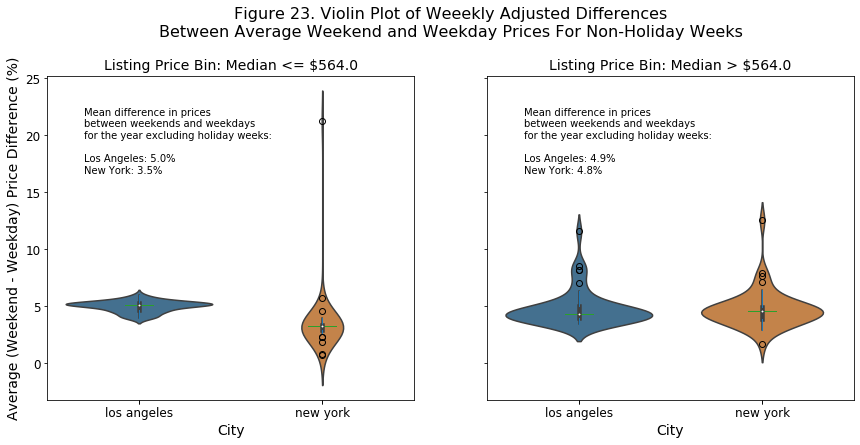

In [83]:
weekly_all = weekend_weekday_diff_pipeline(calendar=calendar, exclude_fixed_price=False, 
                                           exclude_holidays=True, holidays=holidays)

display(weekly_all.sample(5, random_state=RANDOM_STATE))

print('Comparison of weekend-weekday price difference between Los Angeles and New York '
      'for all price listings:\n')
for price_bin in price_bins:
    print(f'Price bin {price_bin}:')
    compare_group_means(df=weekly_all[weekly_all.listing_price_bin==price_bin], 
                        column='price_pdiff', group='city', test='t_test')
    print('\n')

fig23, ax23 = plt.subplots(1, 2, figsize=(14,6), sharey=True)

for ax, price_bin in zip(ax23, price_bins):
    df = weekly_all[weekly_all.listing_price_bin==price_bin]
    sns.violinplot(ax=ax, x='city', y='price_pdiff', data=df, order=cities,
                   saturation=0.5)
    df.boxplot(ax=ax, column='price_pdiff', by='city', 
               grid=False, showbox=False, showcaps=False, positions=np.array([0, 1]))
    ax.set_title(f'Listing Price Bin: {price_bin.capitalize()}')
    ax.set_xlabel('City')
ax23[0].set_ylabel('Average (Weekend - Weekday) Price Difference (%)')
ax23[1].set_ylabel('')
ax23[0].text(-0.3, 0.7, 
             'Mean difference in prices\nbetween weekends and weekdays\n'
             'for the year excluding holiday weeks:\n\n'
             'Los Angeles: 5.0%\nNew York: 3.5%',
             rotation=0, color='k', transform=ax23[0].get_xaxis_transform())
ax23[1].text(-0.3, 0.7, 
             'Mean difference in prices\nbetween weekends and weekdays\n'
             'for the year excluding holiday weeks:\n\n'
             'Los Angeles: 4.9%\nNew York: 4.8%',
             rotation=0, color='k', transform=ax23[1].get_xaxis_transform())
fig23.suptitle('Figure 23. Violin Plot of Weeekly Adjusted Differences\n'
               'Between Average Weekend and Weekday Prices For Non-Holiday Weeks', y=1.06);

From **Figure 23** above we see that average weekend prices are about 3 - 5\% higher than weekday prices for both cities regardless of median listing price. This is not a very large increase, so on average, should not hit renter's pockets very hard. However, as we discussed, over 30% of listings do not change prices throughout the year. Will we see the same weekday/weekend difference if we exclude these listings from the comparison?

Comparison of weekend-weekday price difference between Los Angeles and New York for non-fixed price listings:

Price bin median <= $564.0:


,count,mean,median,std
city,,,,
los angeles,44,7.022495,7.179292,0.601413
new york,44,4.856807,4.495075,3.952654


Difference between groups is 2.1657(30.84%)
Group variances are unequal: W=1.6762, p=1.99e-01
Sample distribution is not normal.
Welch's t-test on non-normally distributed groups with unequal variances:
Difference between group means is statistically significant. Statistic=3.5931, p-value=8.06e-04


Price bin median > $564.0:


,count,mean,median,std
city,,,,
los angeles,44,9.770448,8.101691,4.031963
new york,44,7.504228,7.041627,2.581859


Difference between groups is 2.2662(23.19%)
Group variances are unequal: W=1.1942, p=2.78e-01
Sample distribution is not normal.
Welch's t-test on non-normally distributed groups with unequal variances:
Difference between group means is statistically significant. Statistic=3.1398, p-value=2.44e-03




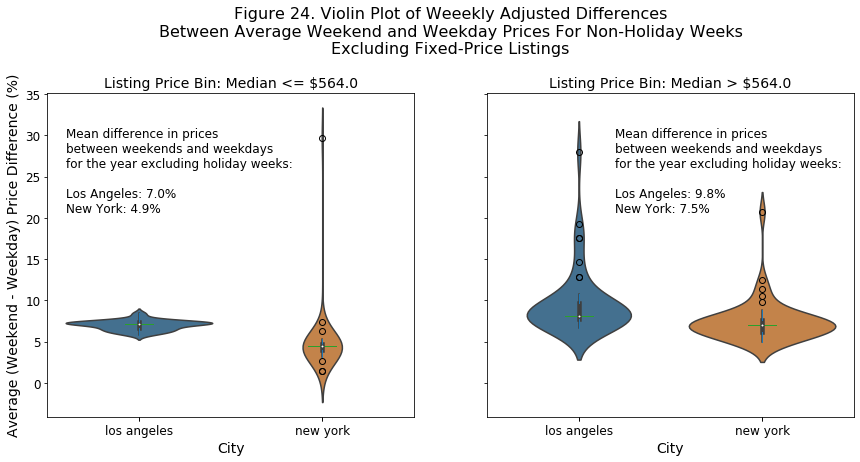

In [84]:
weekly_non_fixed = weekend_weekday_diff_pipeline(calendar=calendar, exclude_fixed_price=True, 
                                                 exclude_holidays=True, holidays=holidays)
weekly_non_fixed.sort_values('price_pdiff', ascending=False)

print('Comparison of weekend-weekday price difference between Los Angeles and New York '
      'for non-fixed price listings:\n')
for price_bin in price_bins:
    print(f'Price bin {price_bin}:')
    compare_group_means(df=weekly_non_fixed[weekly_non_fixed.listing_price_bin==price_bin], 
                        column='price_pdiff', group='city', test='t_test')
    print('\n')

fig24, ax24 = plt.subplots(1, 2, figsize=(14,6), sharey=True)

for ax, price_bin in zip(ax24, price_bins):
    df = weekly_non_fixed[weekly_non_fixed.listing_price_bin==price_bin]
    sns.violinplot(ax=ax, x='city', y='price_pdiff', data= df, order=cities,
                   saturation=0.5)
    df.boxplot(ax=ax, column='price_pdiff', by='city', 
               grid=False, showbox=False, showcaps=False, positions=np.array([0, 1]))
    ax.set_title(f'Listing Price Bin: {price_bin.capitalize()}')
    ax.set_xlabel('City')
ax24[0].set_ylabel('Average (Weekend - Weekday) Price Difference (%)')
ax24[1].set_ylabel('')
ax24[0].text(-0.4, 0.63, 
             'Mean difference in prices\nbetween weekends and weekdays\n'
             'for the year excluding holiday weeks:\n\n'
             'Los Angeles: 7.0%\nNew York: 4.9%',
             rotation=0, color='k', transform=ax24[0].get_xaxis_transform(), fontsize=12)
ax24[1].text(0.2, 0.63, 
             'Mean difference in prices\nbetween weekends and weekdays\n'
             'for the year excluding holiday weeks:\n\n'
             'Los Angeles: 9.8%\nNew York: 7.5%',
             rotation=0, color='k', transform=ax24[1].get_xaxis_transform(), fontsize=12)
fig24.suptitle('Figure 24. Violin Plot of Weeekly Adjusted Differences\n'
               'Between Average Weekend and Weekday Prices For Non-Holiday Weeks\n'
               'Excluding Fixed-Price Listings', y=1.1);

#### Model Evaluation

From comparison tables above, looking at the t-test p-value, we conclude that the difference between Los Angeles and New York weekend price spikes is statistically significant for low-price listings, but not significant for high-price listings when examining all price listings.

The same weekend price spike difference between Los Angeles and New York calculated only for non-fixed price listings, on the other hand, is statistically significant regardless of the listing price bin.

Additionally, it appears that there are a couple of extreme outlier weekends for low median price listings in both cities -- high in New York and low in Los Angeles.

In [85]:
weekly_non_fixed.sort_values('price_pdiff', ascending=False).head()

weekend,city,listing_price_bin,week,weekday_price_ave,weekend_price_ave,price_pdiff
90,new york,median <= $564.0,2018-40,150.982748,195.753460,29.652866
45,los angeles,median > $564.0,2018-40,1244.324864,1591.780679,27.923240
135,new york,median > $564.0,2018-40,943.730000,1139.083333,20.700130
46,los angeles,median > $564.0,2018-41,1215.710448,1449.859589,19.260272
48,los angeles,median > $564.0,2018-43,1196.680490,1407.414477,17.609879


Week 40 of 2018 is the problem week. Going back to the date range for our calendar (2018-10-03 to 2019-10-05), we see that this week is the starting week for our dataset and covers only a portion of the week. Hence, the (weekend - weekday) price difference for that week may have been impacted. However, no further steps are necessary since our statistical test already account for distribution non-normality caused by these outliers.  

## Conclusions

In this work we have performed exploratory analysis of Airbnb listing and calendar data to compare listing properties and pricing between Los Angeles and New York. We have followed a CRISP-DM process as follows:

1. **Business Understanding**: Transformed broad business questions into a set of narrow and specific questions for which analysis can be tailored
2. **Data Understanding**: Found and loaded data relevant to intended analysis. Explored loaded data
3. **Data Preparation**: Cleaned missing or unusable values. Engineered useful for analysis features
4. **Modeling**: Performed exploratory analysis aimed to answer business questions
5. **Evaluation**: Evaluated statistical significance of the obtained results
6. **Deployment**: Generated Jupyter Notebook with reproducible analysis, related documentation, and references

The results of the analysis are summarized below:

**Are there differences in the types and sizes of Airbnb listings between Los Angeles and New York?**
- Lower median price bin listings (median price <= \$564) in New York are predominantly apartments, while in Los Angeles they are closely split between apartments and houses. Half of the high median price listings (median price > \\$564) in New York are still apartments with the other half split between lofts, townhouses and houses. Los Angeles high median price listings, on the other hand, are mostly houses (including large houses, aka villas).
- The distribution of room types for both cities is similar -- split between entire homes/apartments and private rooms for lower median-price listings; and predominantly entire homes/apartments for high median-price listings.
- Lower median price listings (<=\$564.00) are similar in size between Los Angles and New York with median one bedroom, one bathroom, and one bed with per listing. However, more expensive listings are in all respects larger in Los Angeles where median listing is able to accommodate up to 8 people in 4 bedrooms, 3.5 bathrooms and 4 beds versus New York where median listing is  able to accommodate up to 6 people in 3 bedrooms, 2 bathrooms and 3 beds.

**Are there differences in the offered amenities?**
- Hosts in Los Angeles list about 4 more amenities on average than hosts in New York. The difference in the number of listed amenities is statistically significant for lower-price listings, but the effect size is smaller in higher-price listings.
- "wifi" is the most listed amenity for both cities, with "kitchen" and "essentials" showing up in top 5 for each city regardless of median listing price. Both "heating" and "air conditioning" are in the top 5 listed amenities for New York but not Los Angeles, where "smoke detector" occurs more frequently.

**Do the type and size differences translate into listing price differences?**
- The difference in raw average listing prices for listings below \$564 median price between Los Angeles and New York are not statistically significant. While 30\% higher average listing prices for higher-price listings in Los Angeles are statistically significant.
- Since listings in Los Angeles tend to be larger, to estimate the listing **value** to renter we examined price per bedroom and found no statistically significant differences between Los Angeles and New York.

**Are there differences in the price trends throughout the year?**
- We find no significant difference in overall price trends between the two cities. 
- There are, however, differences in the magnitude of change of prices throughout the year. One of the more noticeable differences is that New York prices spike 1.5-3 times more (at 15-25\% average price spike) around New Years and Christmas as compared with Los Angeles (at 7-15\% average price spike), with the higher median price listings showing a larger *relative* price spikes. 
- Additionally, winter prices after New Year's in New York drop slightly more than in Los Angeles (10\% as compared with 5\%).
- Finally, on average renters can expect weekend prices (Friday and Saturday bookings) to spike ~5\% in Los Angeles and 3.5-4.8\% in New York. However, if we exclude listings from hosts who do not change prices throughout the year, the average price increases by hosts are 7-10\% in Los Angeles and 5-7.5\% in New York, respectively.  

**Are some seasons more available and/or less expensive throughout the season?** 
- Availability follows similar patterns for both cities with peak availability in the late fall winter months and lowest availability in the summer and early fall.
- It appears that availability is inversely correlated with the prices (except for New Year and Christmas). The lowest prices for both cities are during winter (again with an exception of New Year and Christmas).
- Overall, price fluctuations are not extreme with most fluctuations of less than +/-10\% with the exception of New Years and Christmas

**What are the best times to visit each city in terms of price and availability?**  
In terms of price and availability it appears that the best times to visit each city depend on the type of listing you're looking to rent:
- **Higher median price listings ( >\$564)** are cheaper winter months after New Years, especially in New York, where prices drop to lowest of the year by far.
- **Lower median price listings (<= \$564)** are still the cheapest and most available in New York during the winter months. However, in Los Angeles, lowest prices are observed in the fall. 

## References
  - [1] Los Angeles calendar: (http://data.insideairbnb.com/united-states/ca/los-angeles/2018-10-05/data/calendar.csv.gz)
  - [2] New York calendar: (http://data.insideairbnb.com/united-states/ny/new-york-city/2018-10-03/data/calendar.csv.gz)
  - [3] Los Angeles listings: (http://data.insideairbnb.com/united-states/ca/los-angeles/2018-10-05/data/listings.csv.gz)
  - [4] New York listings: (http://data.insideairbnb.com/united-states/ny/new-york-city/2018-10-03/data/listings.csv.gz)
  - [5] Kaggle Airbnb Seattle: https://www.kaggle.com/airbnb/seattle
  - [6] Seasons: https://www.farmersalmanac.com/the-seasons
  - [7] When to perform effect size test https://stats.stackexchange.com/questions/4075/how-to-perform-t-test-with-huge-samples/4079
  - [8] Cohen's D: https://en.wikipedia.org/wiki/Effect_size#Cohen's_d
  - [9] Cliff's delta: https://en.wikipedia.org/wiki/Effect_size#Effect_size_for_ordinal_data
  - [10] Independent t-test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
  - [11] Kruskal-Wallis H-testhttps://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.kruskal.html
  - [12] Welch's test: https://en.wikipedia.org/wiki/Welch%27s_t-test

In [86]:
!jupyter nbconvert --to html airbnb_analysis.ipynb

[NbConvertApp] Converting notebook airbnb_analysis.ipynb to html
[NbConvertApp] Writing 1363027 bytes to airbnb_analysis.html
